In [1]:
import numpy as np
import itertools as it
from multiprocessing import Pool


def multiprocessing(func, args, workers):
    with Pool(workers) as ex:
        res = ex.map(func, args)
    return list(res)


In [9]:
def ppc(neuron, phase, n = None,n_shuffles = None):
    if (n is not None) and (len(neuron)>n):
        neuron = nts.Ts(np.sort(np.random.choice(neuron.times(),n)))
    
    neuron_phase = phase.realign(neuron)
    neuron_phase = neuron_phase.values.astype(np.float16)
    

    pcc = neuron_phase[None, :] - neuron_phase[:, None]
    pcc[np.diag_indices_from(pcc)] = np.nan
    pcc = np.cos(pcc)
    return np.nanmean(pcc, 0).mean()

In [10]:
def jitter_spikes(neuron,tmax,time_units = 'ms'):
    jit = (np.random.rand(len(neuron)) - 0.5)*tmax*2
    new_spikes = neuron.times(time_units)+jit
    return nts.Ts(np.sort(new_spikes),time_units)

In [11]:
def ppc_jitter(args):
    neuron = args[0]
    phase = args[1]
    tmax = args[2]
    n = args[3]
    i = args[4]

    np.random.seed()
    return ppc(jitter_spikes(neuron,tmax),phase,n),i

In [4]:
%run imports

In [5]:
bk.load.current_session_linux()
states = bk.load.states(True)
neurons, metadata = bk.load.spikes()
lfp = bk.load.lfp_in_intervals(bk.load.ripple_channel(),states['REM'])
filt_lfp = bk.signal.passband(lfp,6,10)
power,phase = bk.signal.hilbert(filt_lfp)

Rat : 8 on day : 6
Working with session Rat08-20130713 @ /mnt/electrophy/Gabrielle/GG-Dataset-Light/Rat08/Rat08-20130713
Data already saved in Numpy format, loading them from here:
Rat08-20130713-neurons.npy
Rat08-20130713-metadata.npy


In [73]:
bk.load.current_session_linux(local_path='Rat08/Rat08-20130717')
states = bk.load.states(True)
neurons, metadata = bk.load.spikes()
lfp = bk.load.lfp_in_intervals(bk.load.ripple_channel(),states['REM'])
filt_lfp = bk.signal.passband(lfp,6,10)
power,phase = bk.signal.hilbert(filt_lfp)

Rat : 8 on day : 9
Working with session Rat08-20130717 @ /mnt/electrophy/Gabrielle/GG-Dataset-Light/Rat08/Rat08-20130717
Data already saved in Numpy format, loading them from here:
Rat08-20130717-neurons.npy
Rat08-20130717-metadata.npy


In [74]:
# Params :
phase = phase
jitter_max = 140
n_spikes = 1500
n_shuffles = 2000

/tmp/ipykernel_963313/2573324234.py:15: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


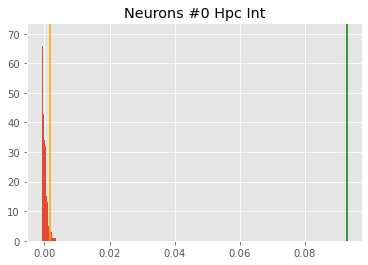

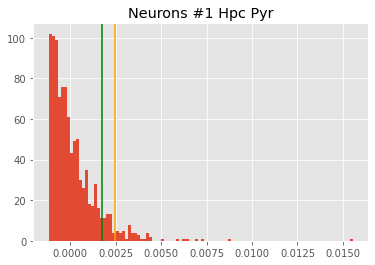

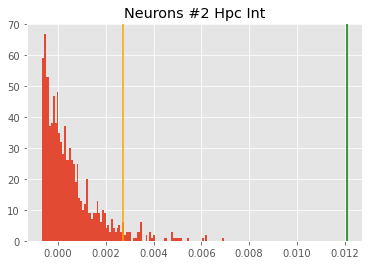

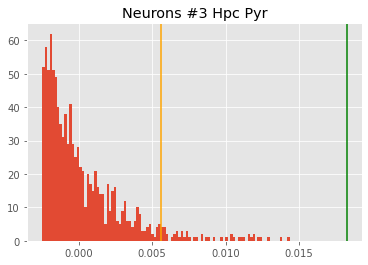

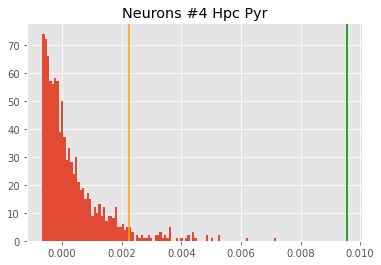

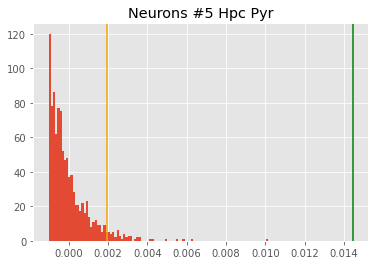

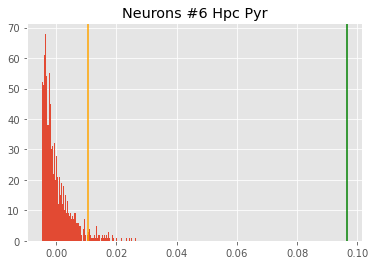

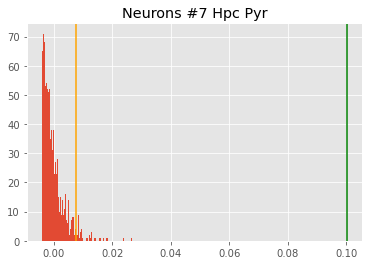

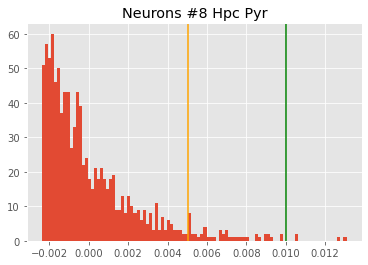

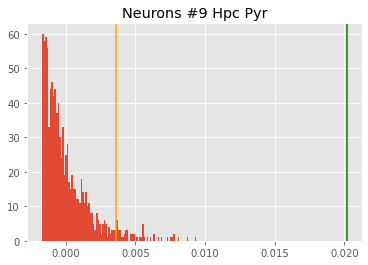

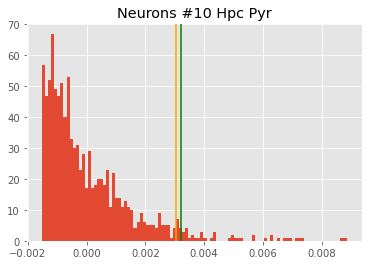

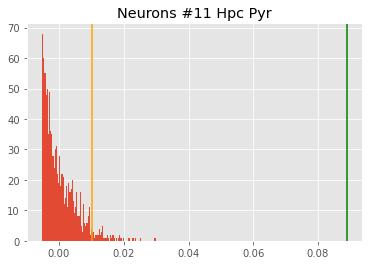

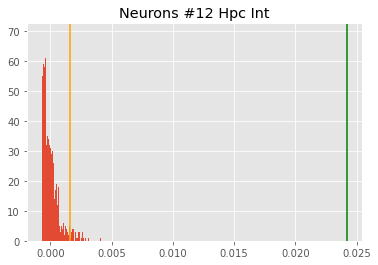

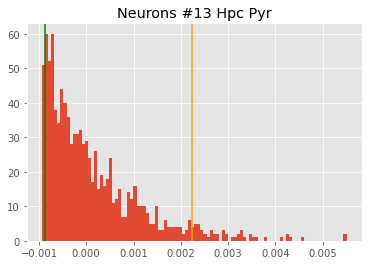

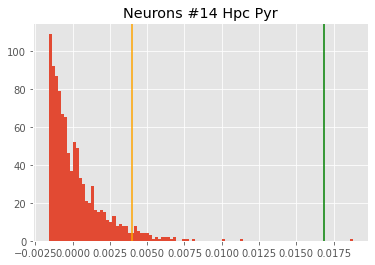

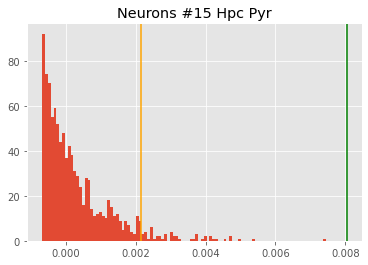

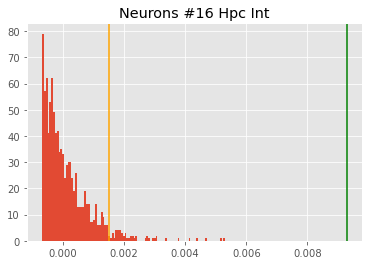

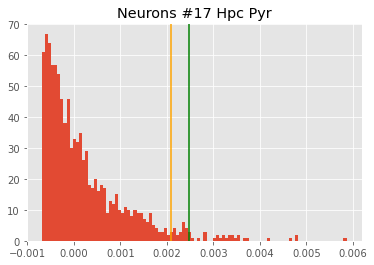

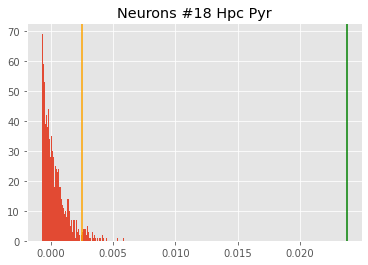

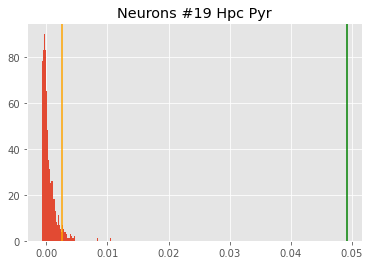

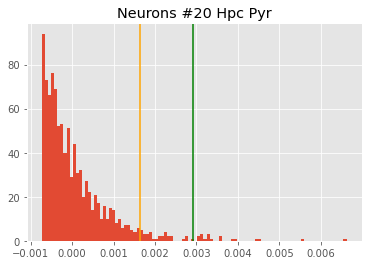

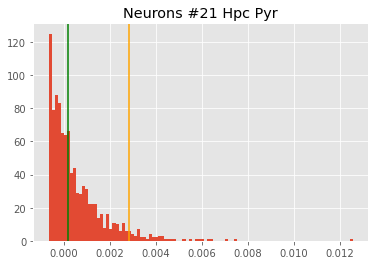

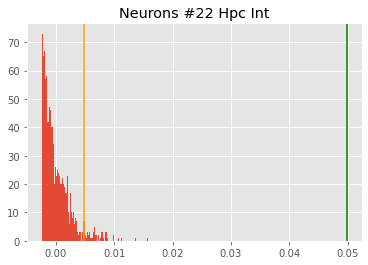

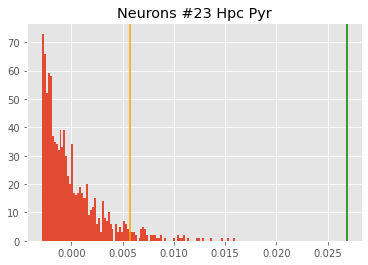

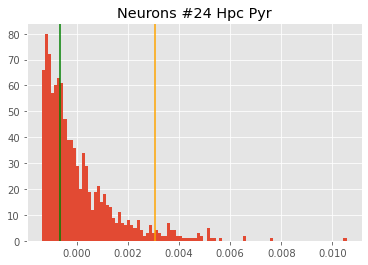

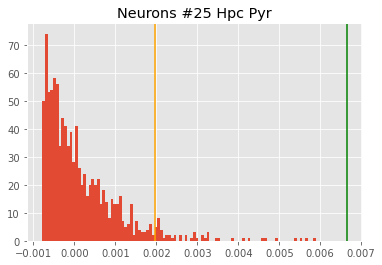

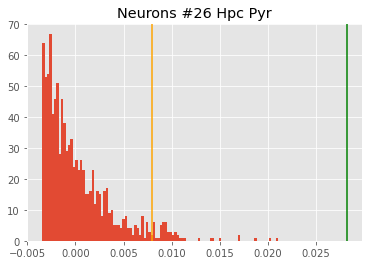

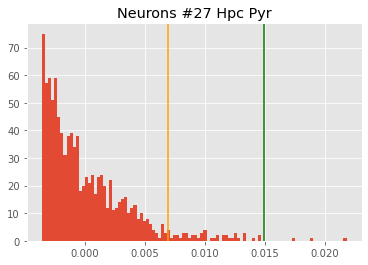

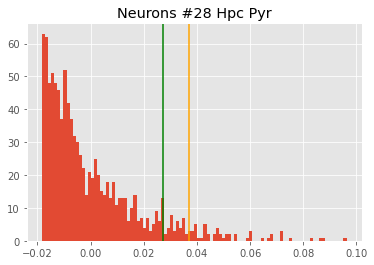

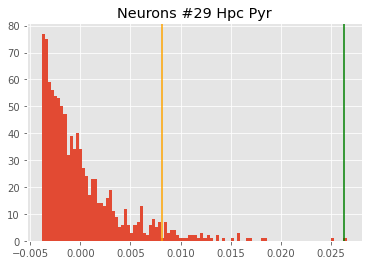

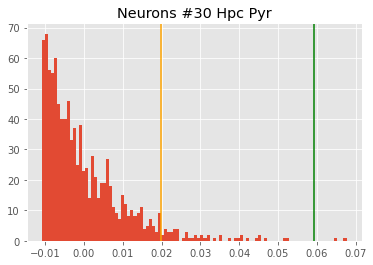

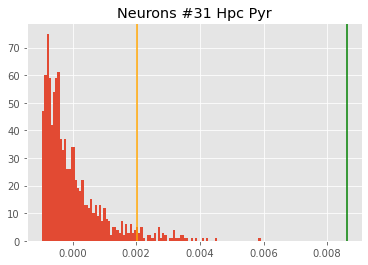

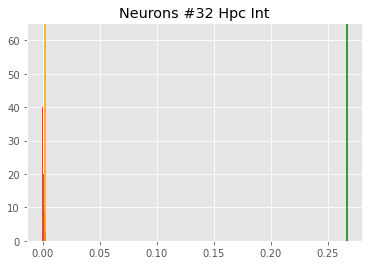

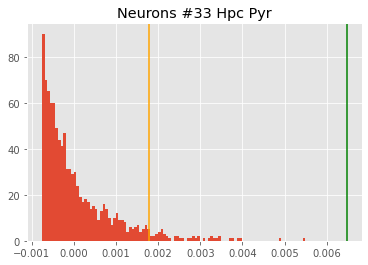

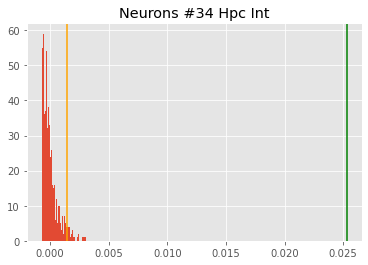

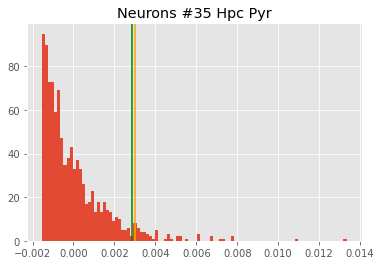

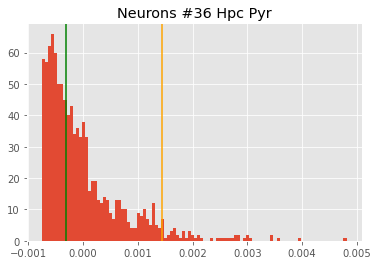

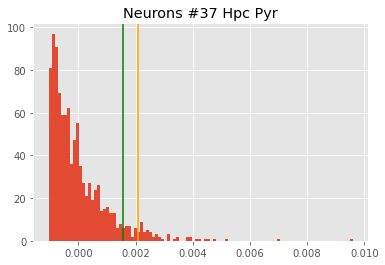

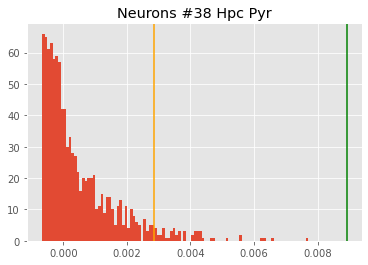

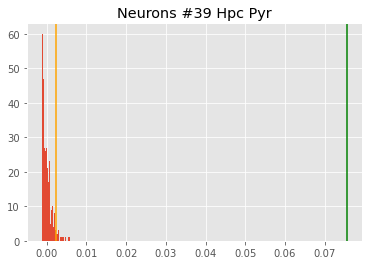

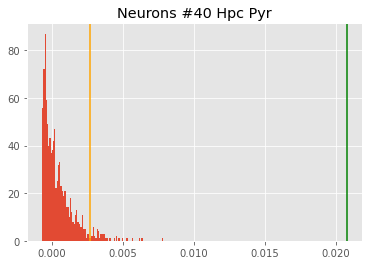

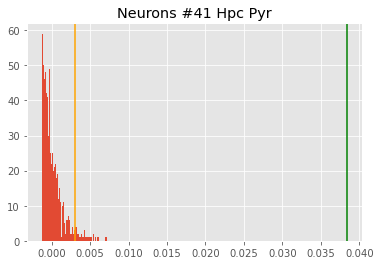

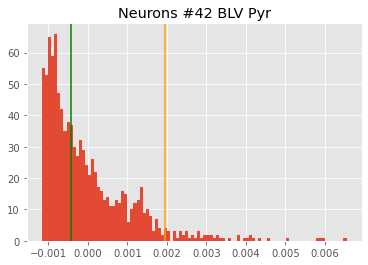

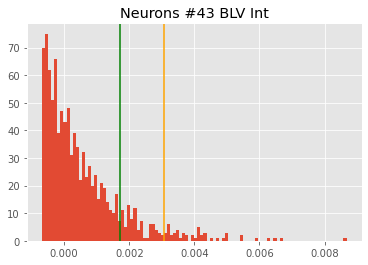

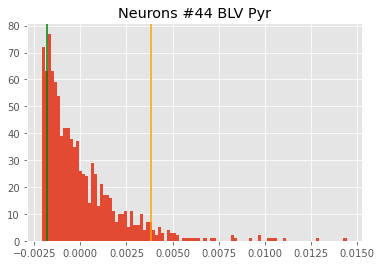

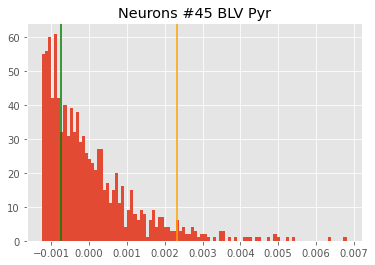

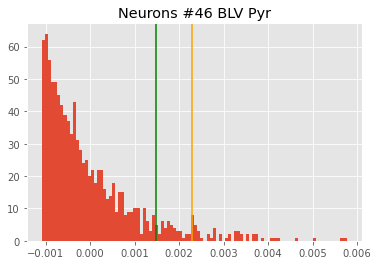

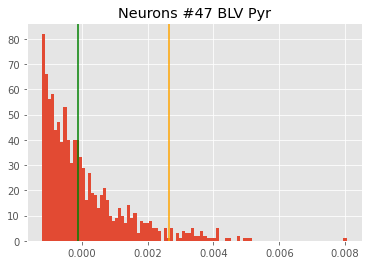

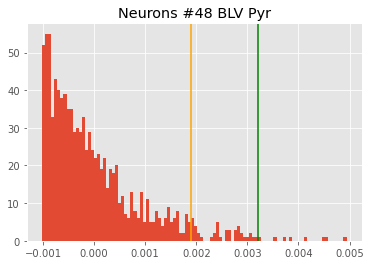

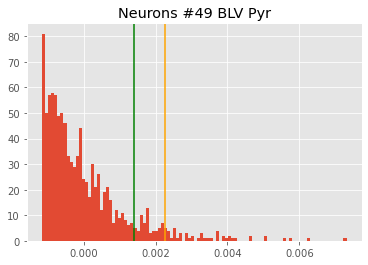

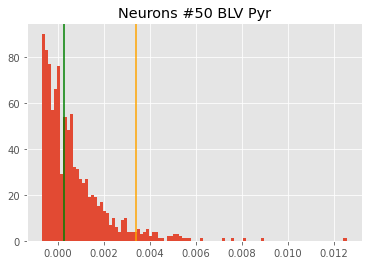

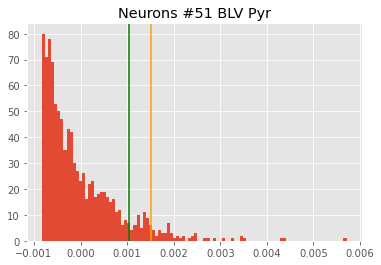

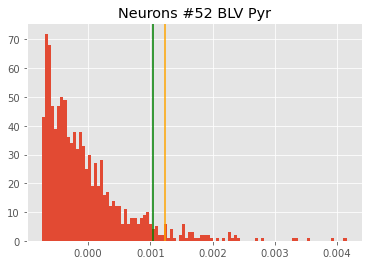

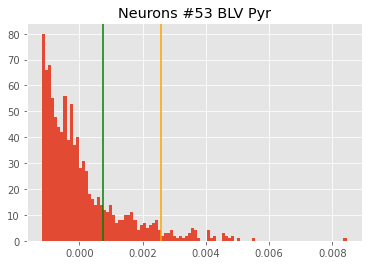

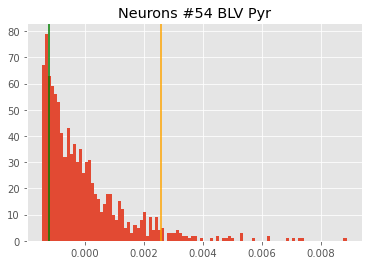

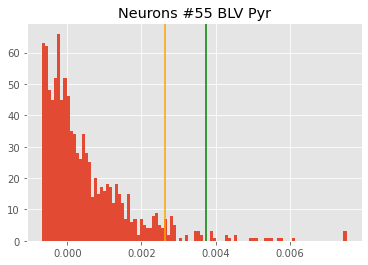

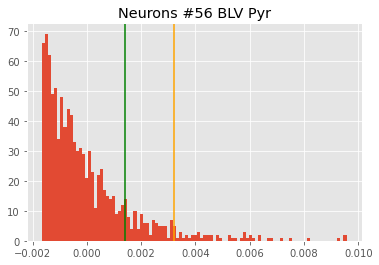

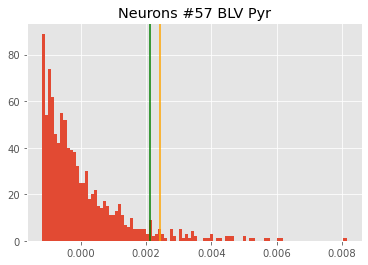

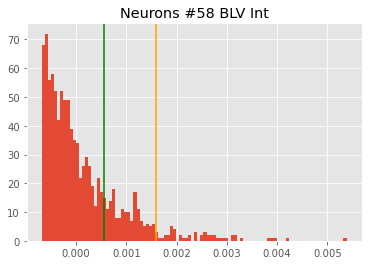

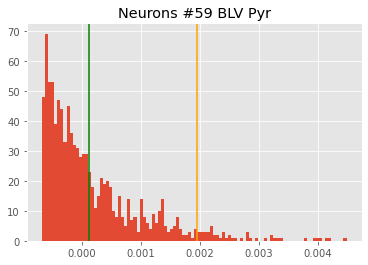

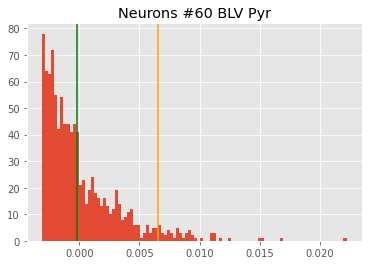

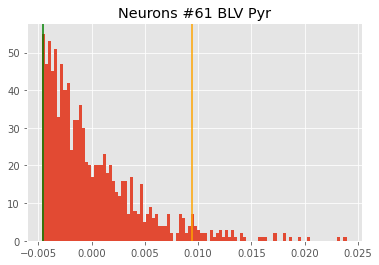

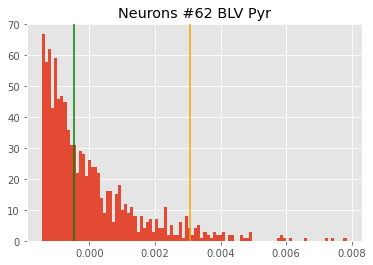

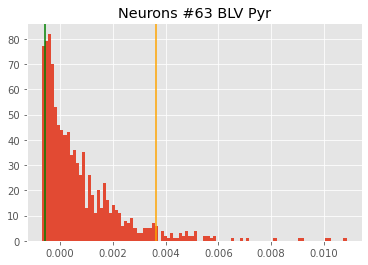

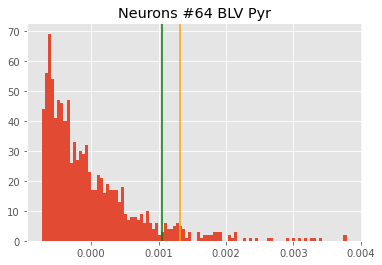

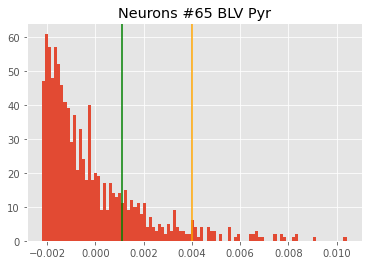

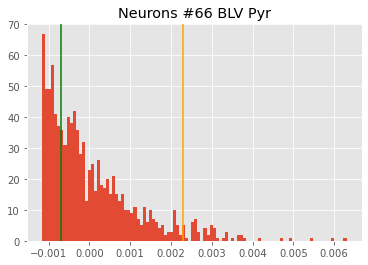

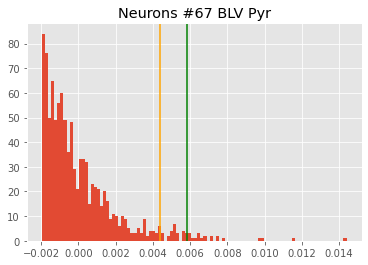

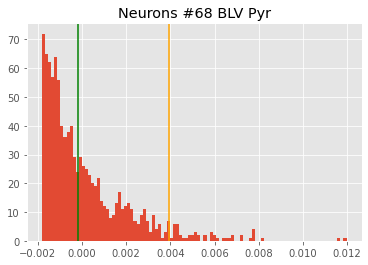

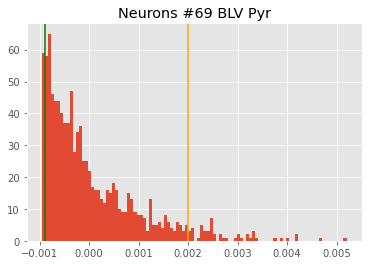

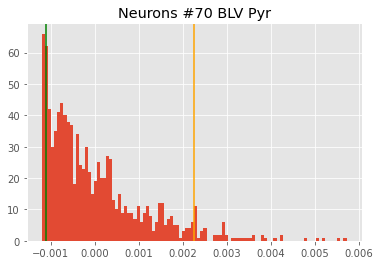

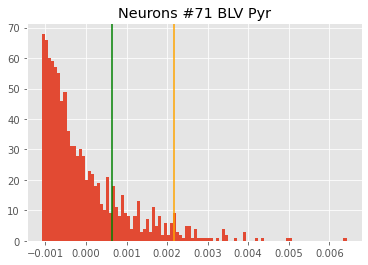

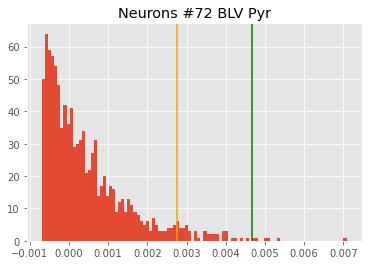

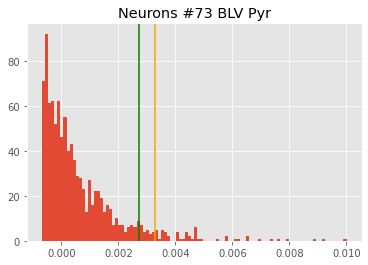

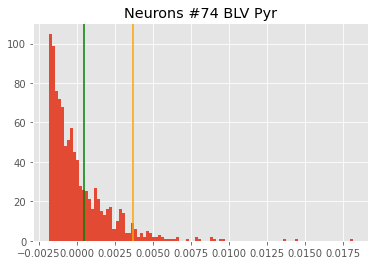

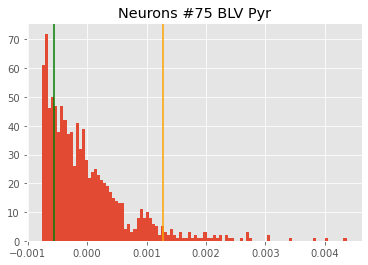

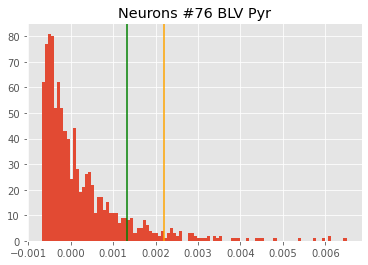

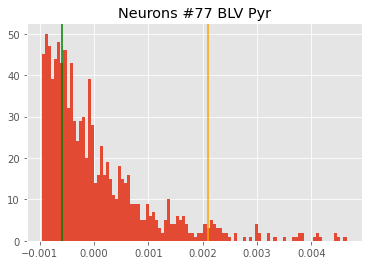

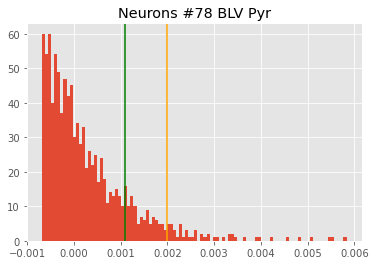

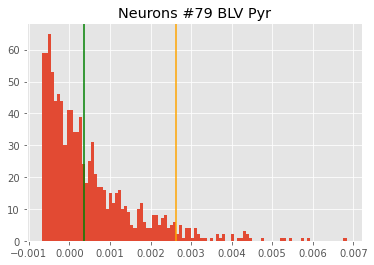

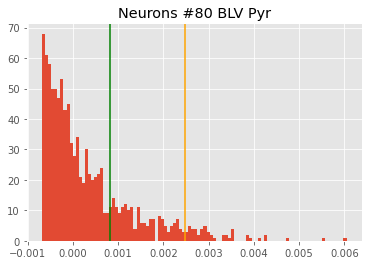

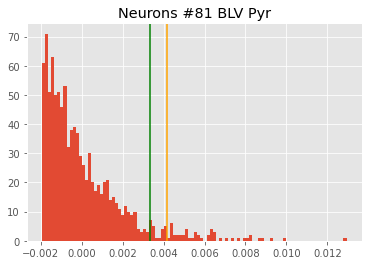

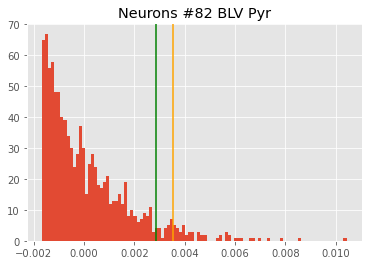

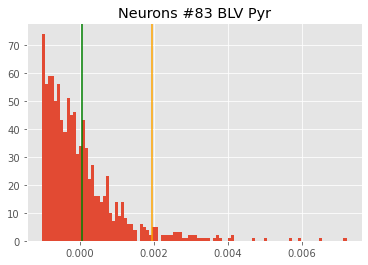

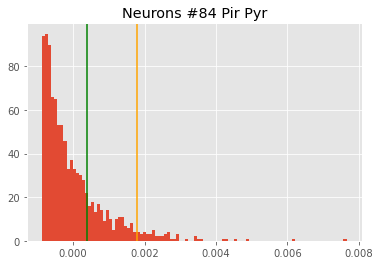

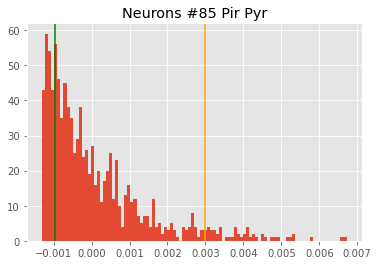

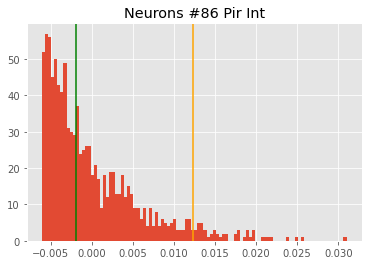

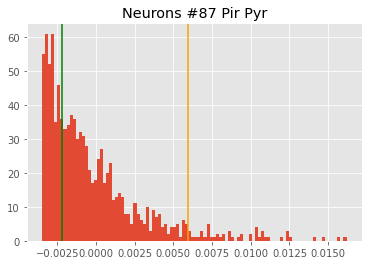

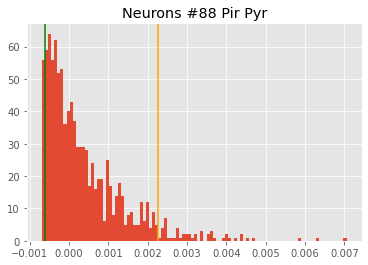

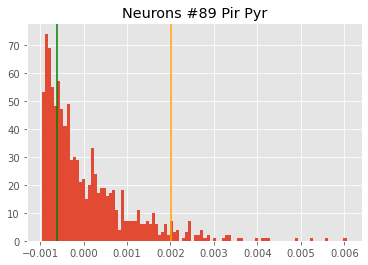

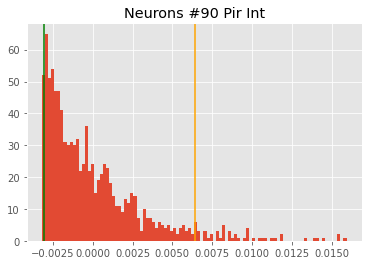

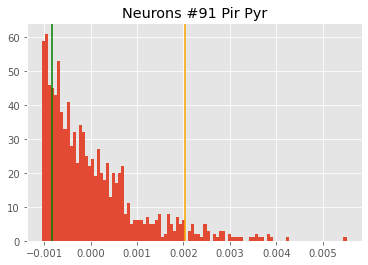

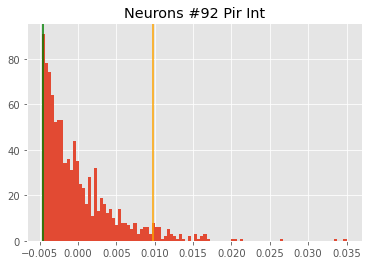

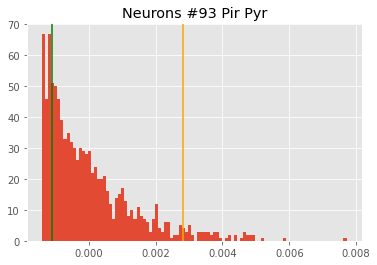

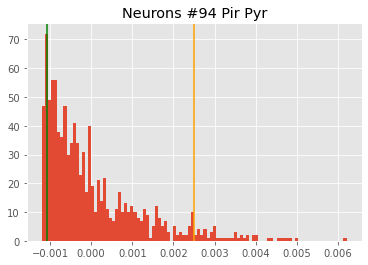

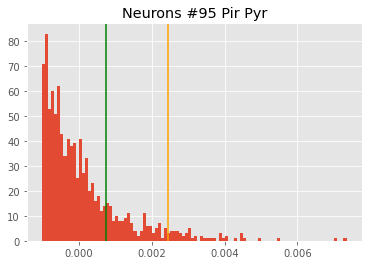

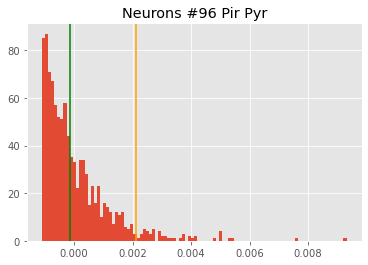

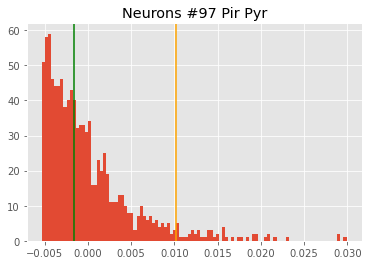

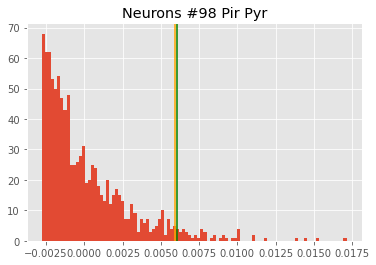

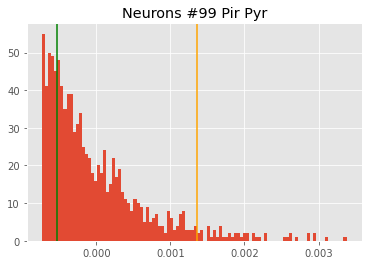

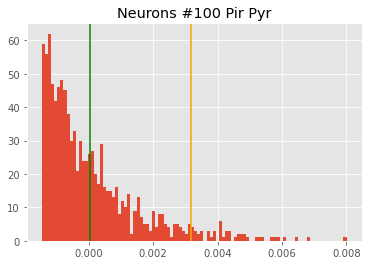

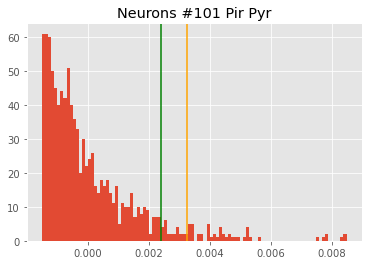

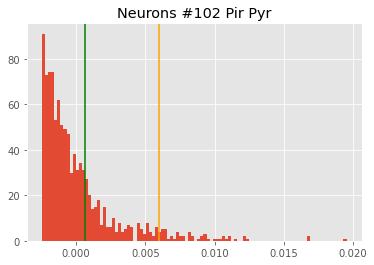

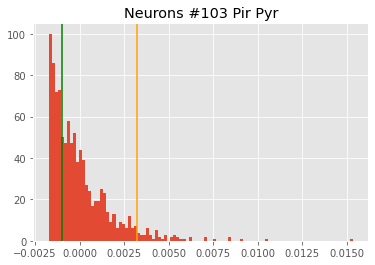

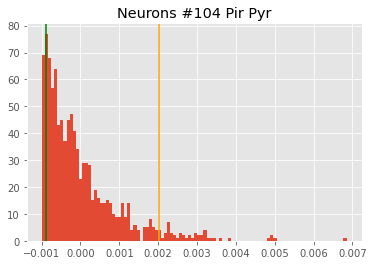

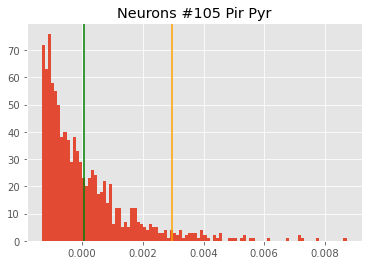

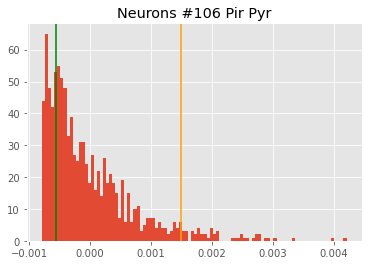

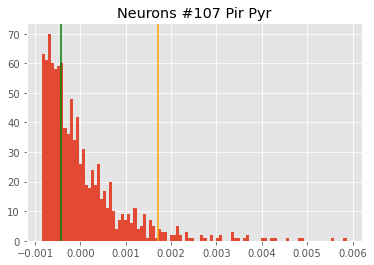

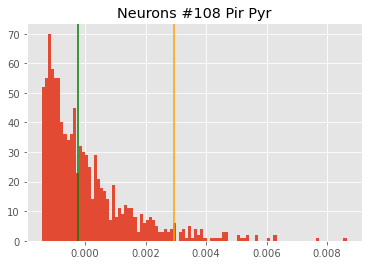

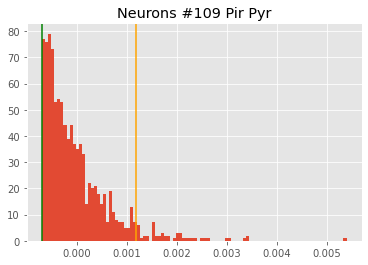

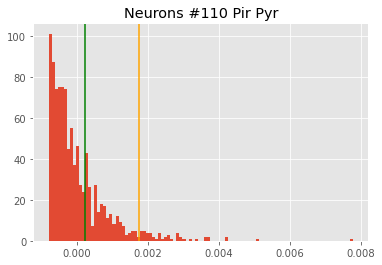

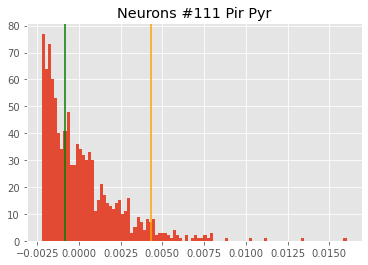

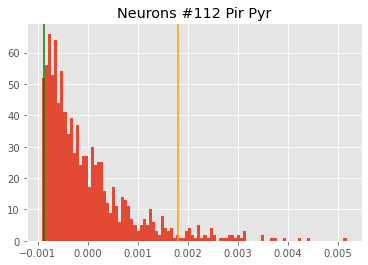

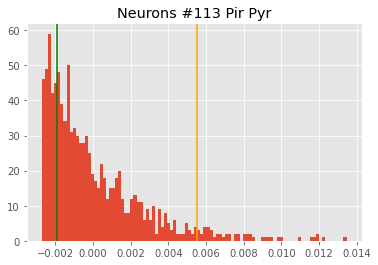

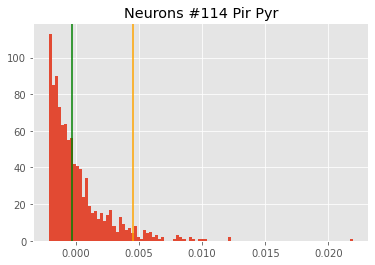

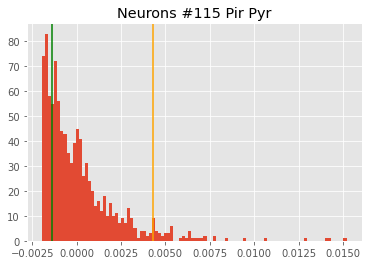

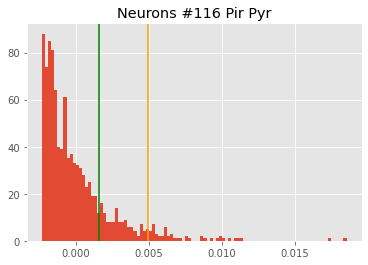

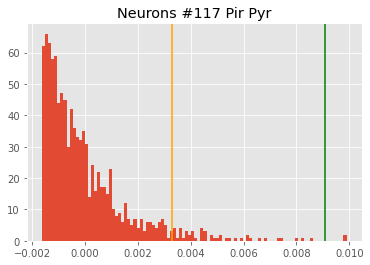

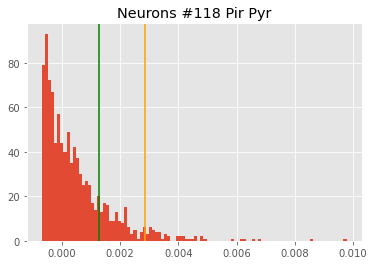

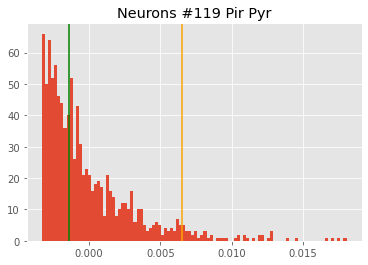

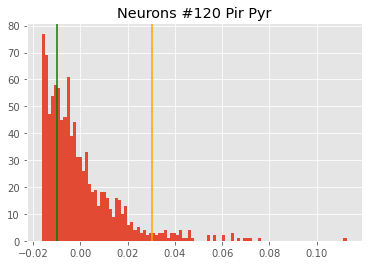

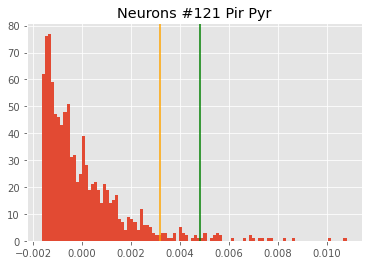

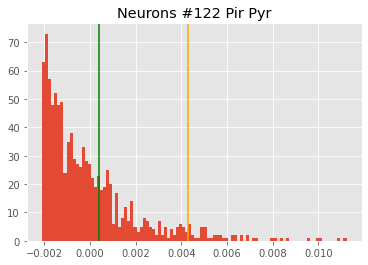

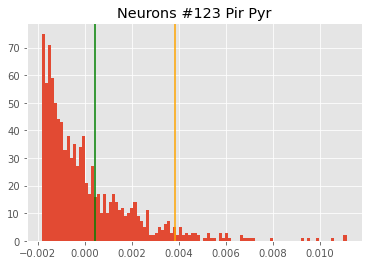

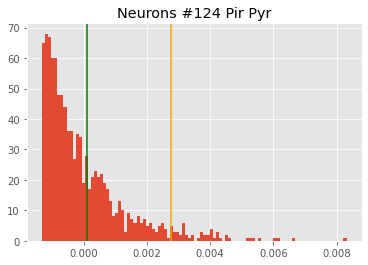

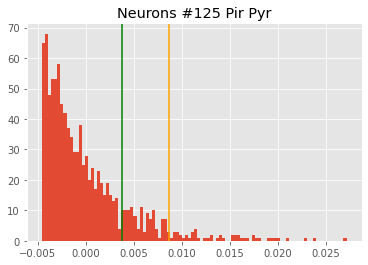

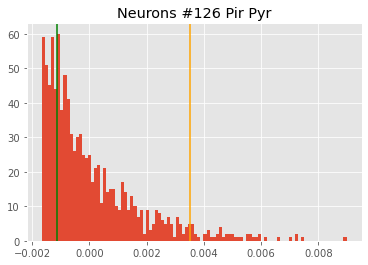

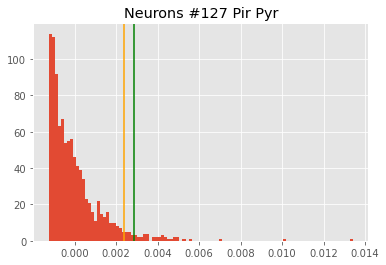

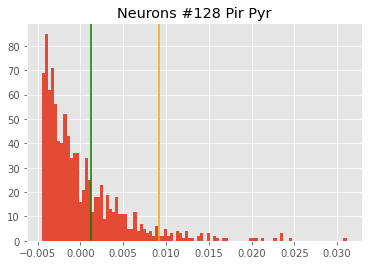

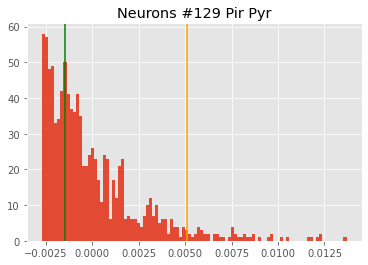

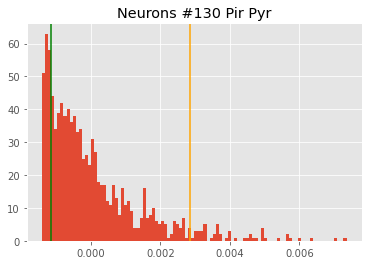

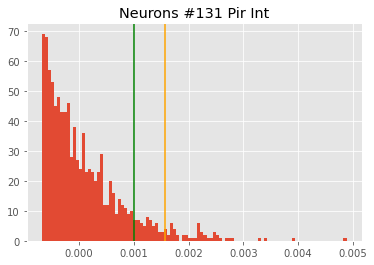

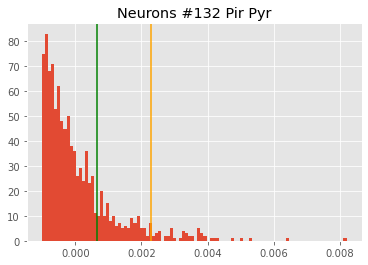

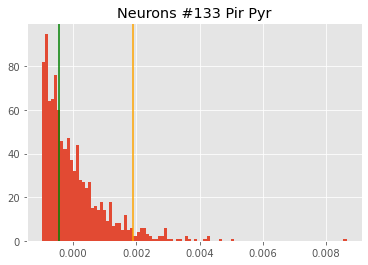

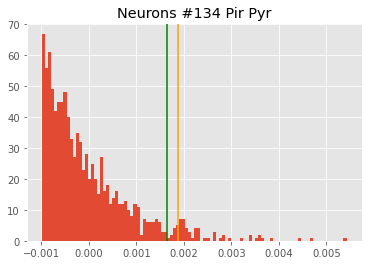

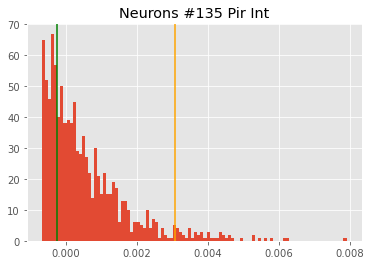

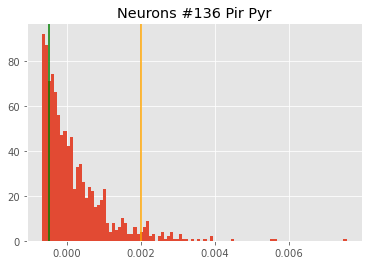

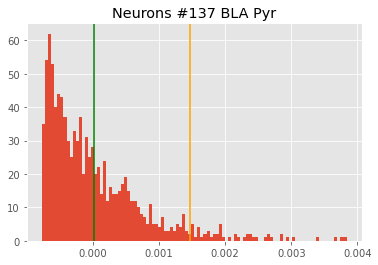

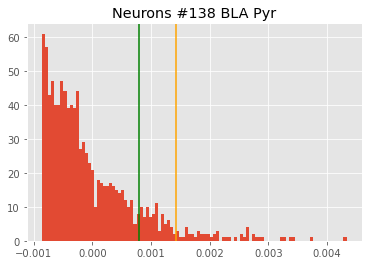

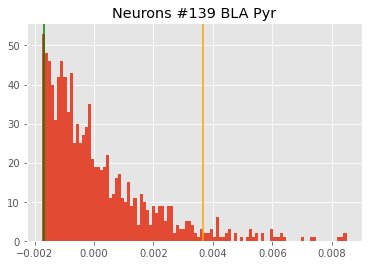

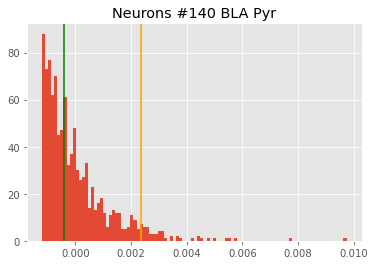

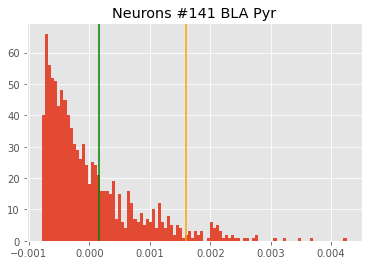

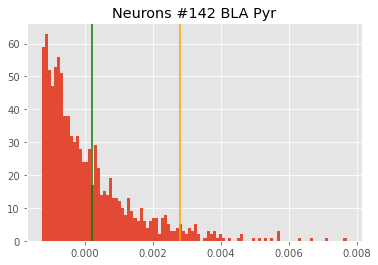

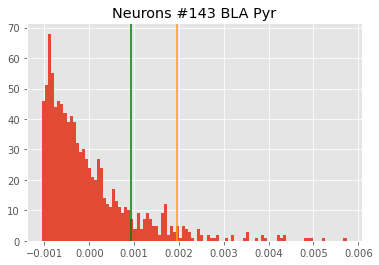

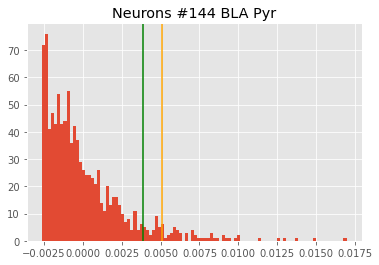

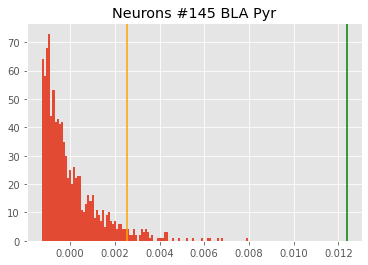

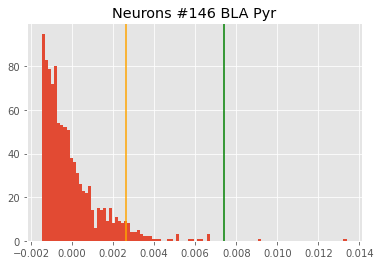

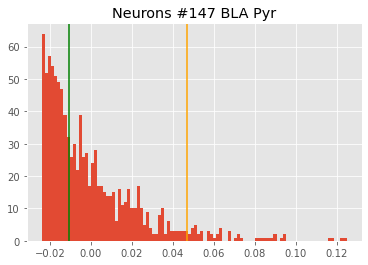

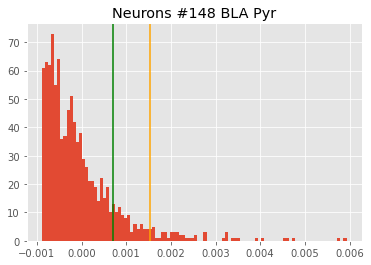

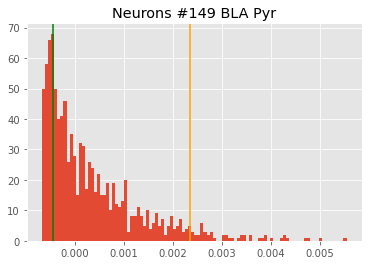

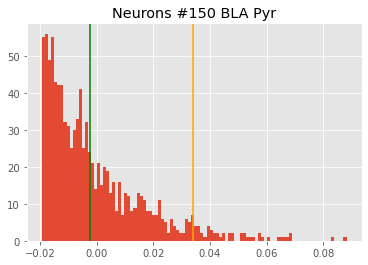

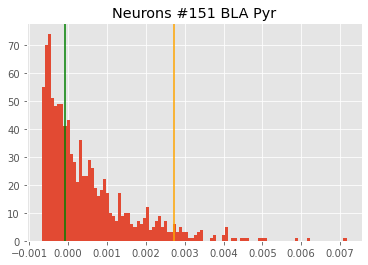

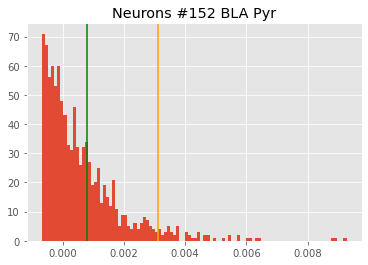

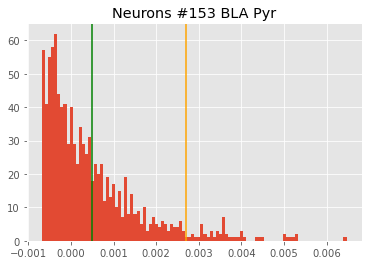

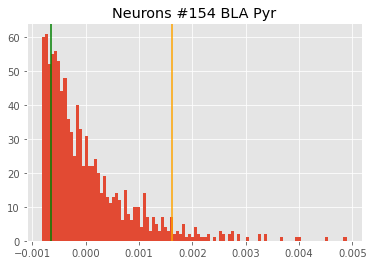

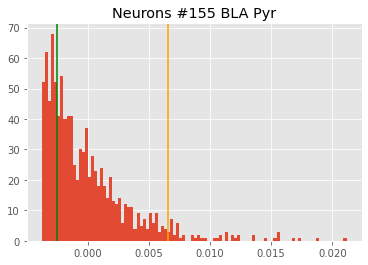

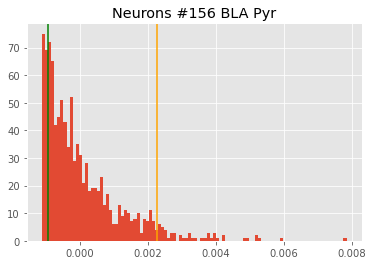

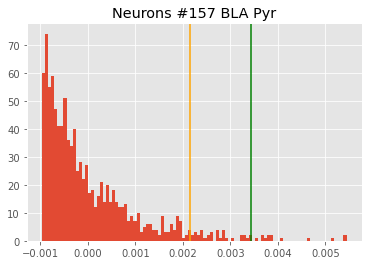

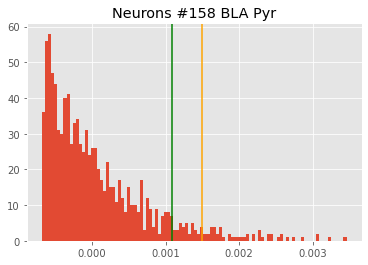

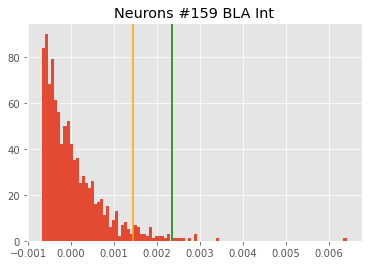

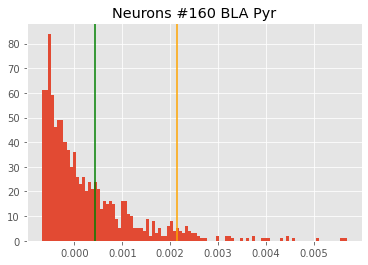

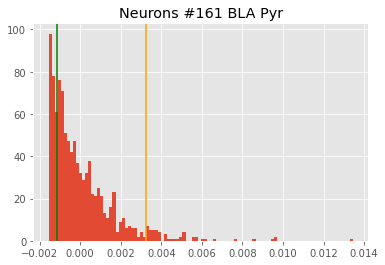

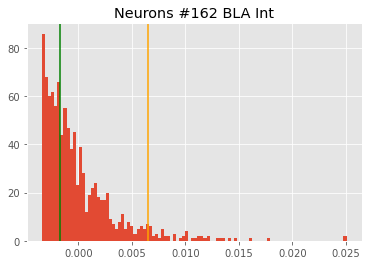

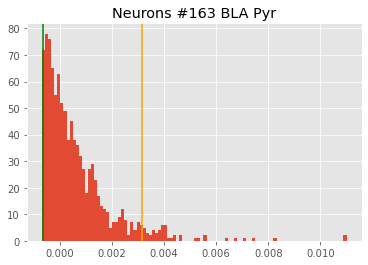

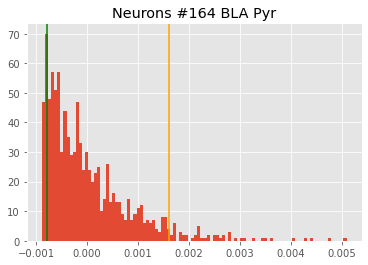

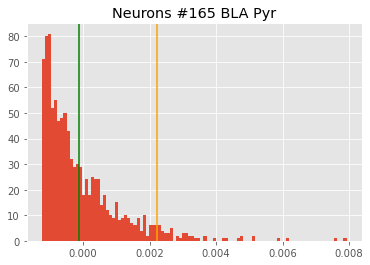

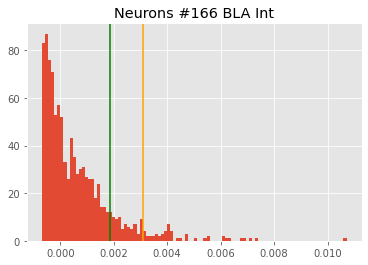

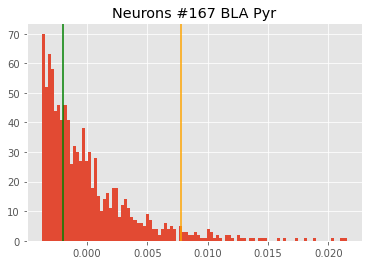

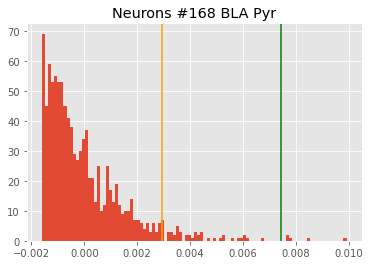

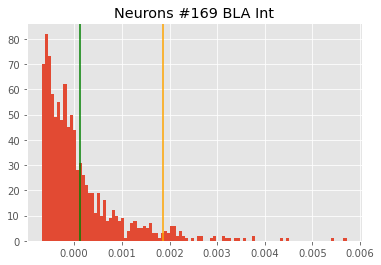

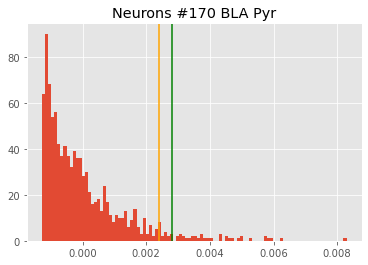

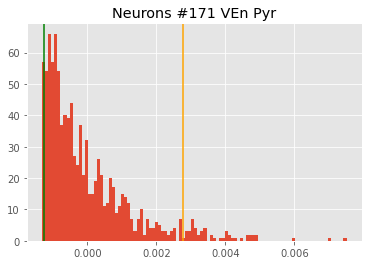

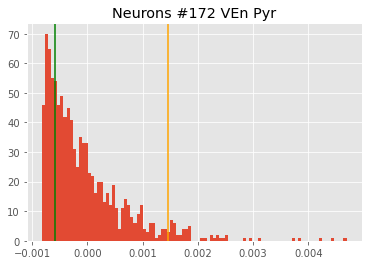

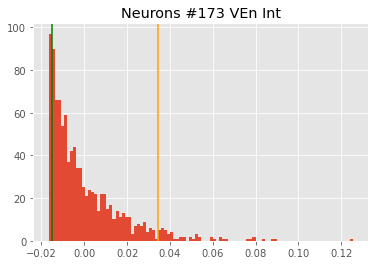

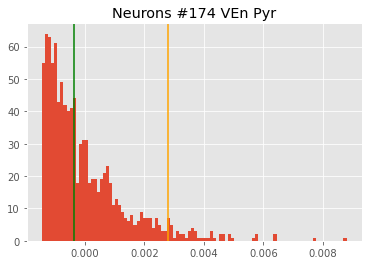

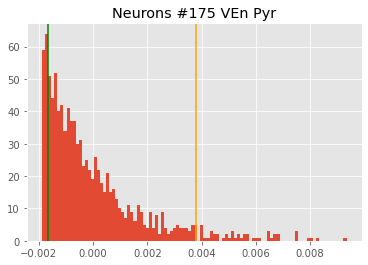

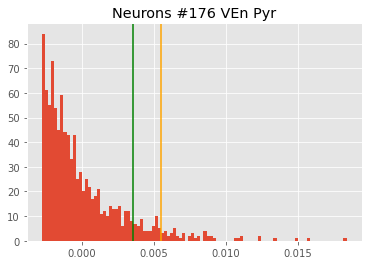

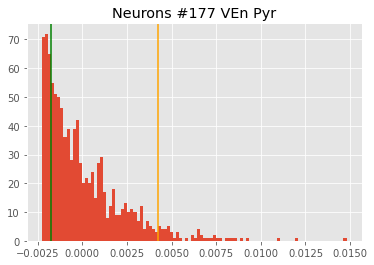

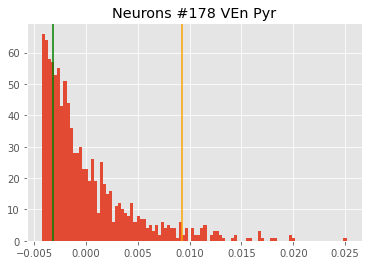

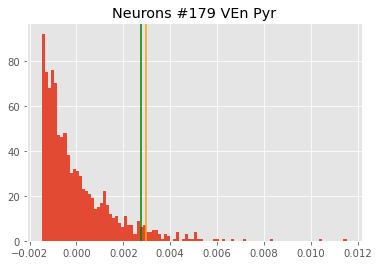

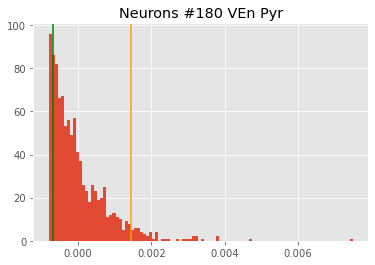

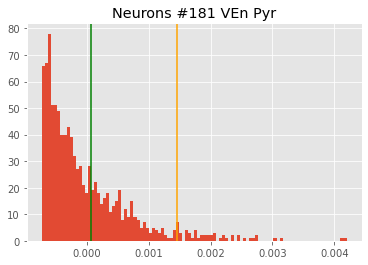

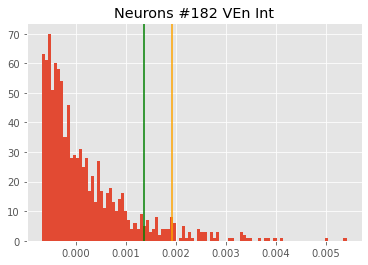

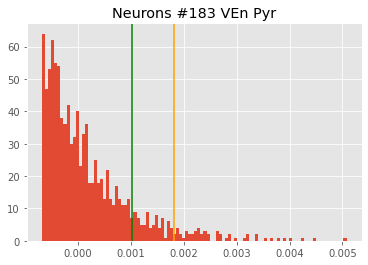

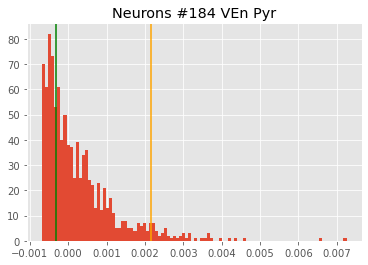

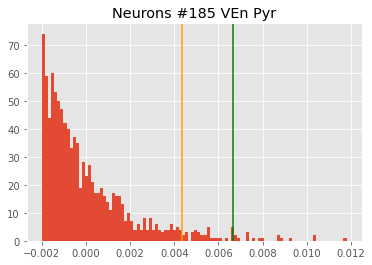

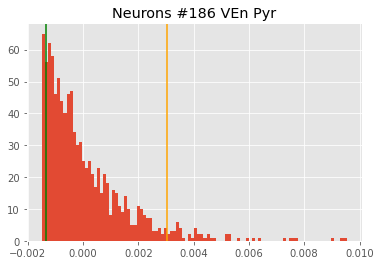

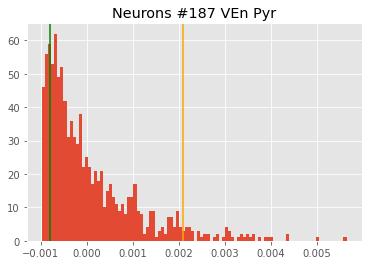

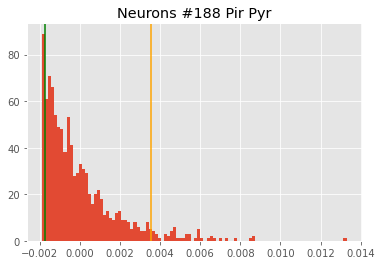

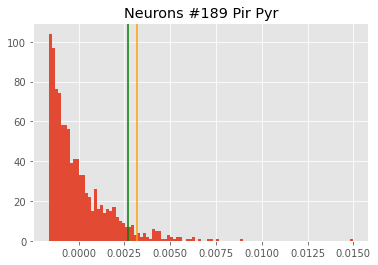

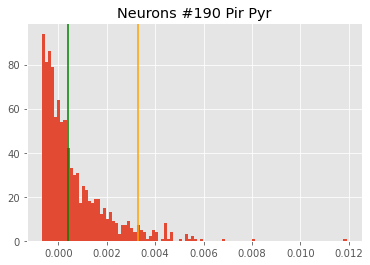

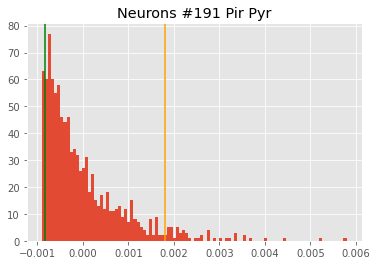

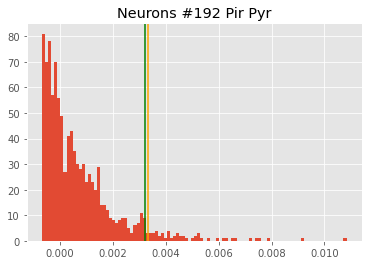

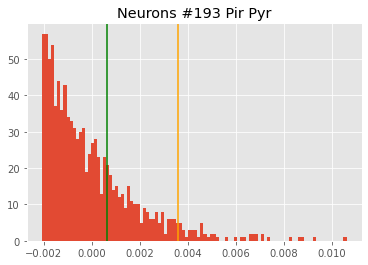

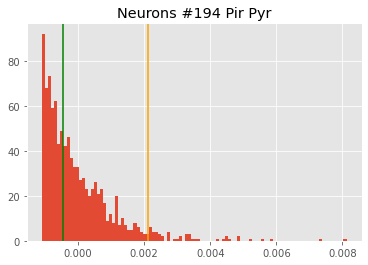

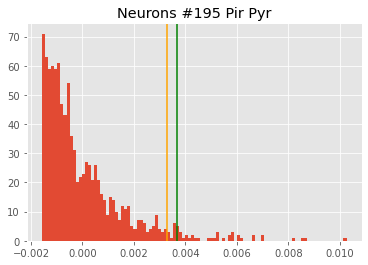

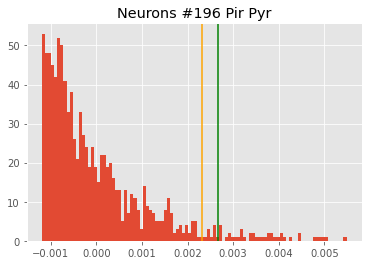

In [75]:
for i in range(len(neurons)):
    neuron = neurons[i].restrict(states['REM'])
    phase = phase
    jitter_max = 140
    n_spikes = 1500
    n_shuffles = 1000

    shuffles = multiprocessing(ppc_jitter, zip(it.repeat(neuron), 
                                        it.repeat(phase), 
                                        it.repeat(jitter_max), 
                                        it.repeat(n_spikes), 
                                        range(n_shuffles)), 
                                        12)
    real = ppc(neuron,phase,n_spikes)
    plt.figure()
    plt.hist(np.array(shuffles)[:,0],100)
    plt.axvline(real,color = 'green')
    plt.axvline(np.quantile(np.array(shuffles)[:,0],0.95),color = 'orange')
    plt.title(f'Neurons #{i} {metadata.Region[i]} {metadata.Type[i]}')

/tmp/ipykernel_963313/1411114165.py:15: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


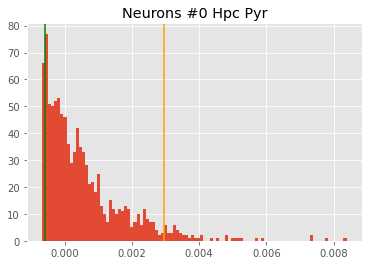

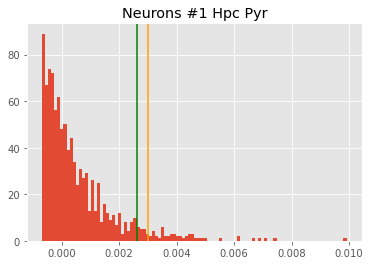

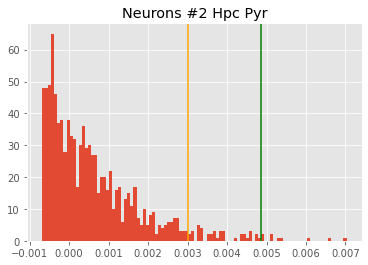

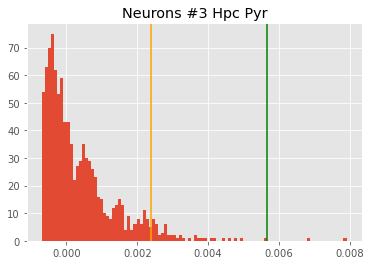

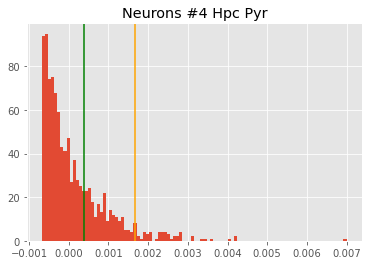

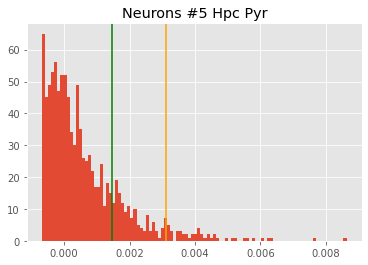

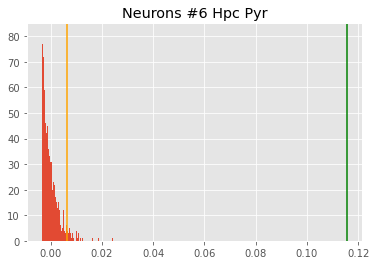

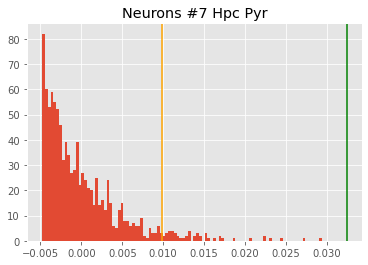

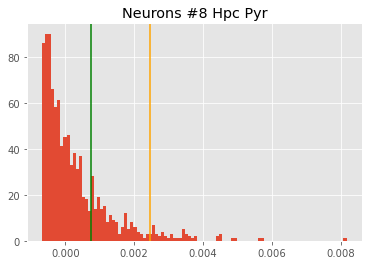

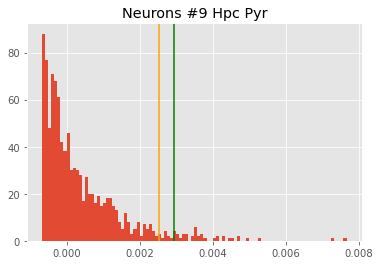

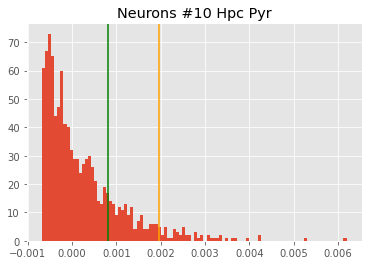

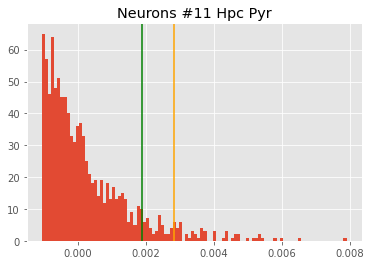

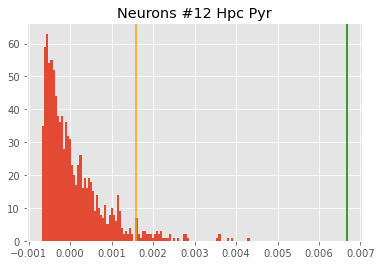

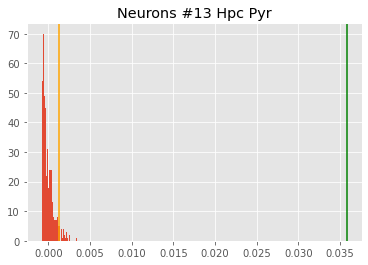

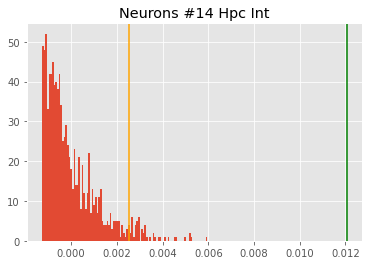

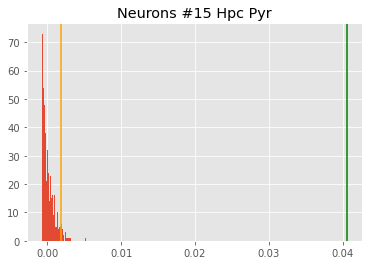

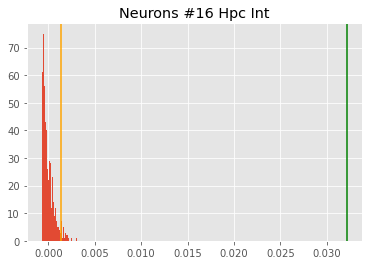

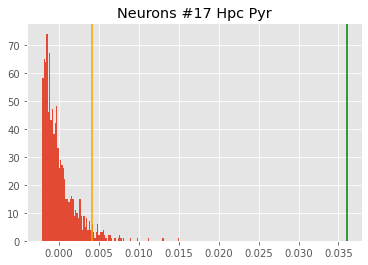

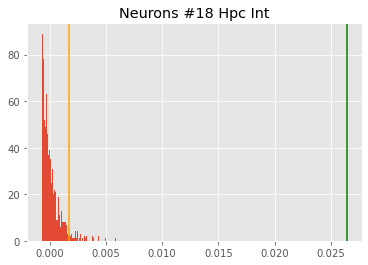

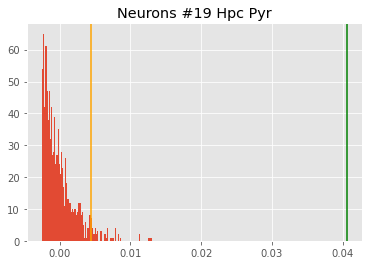

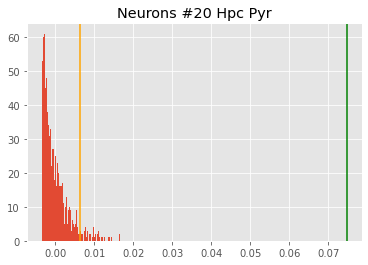

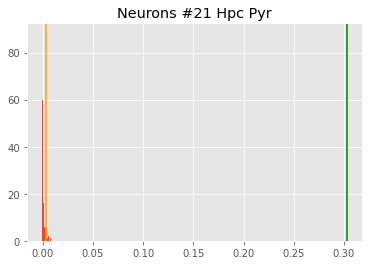

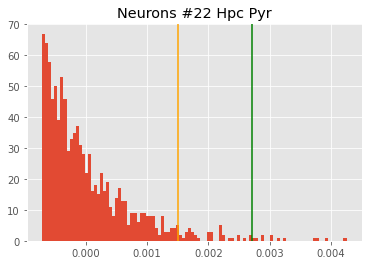

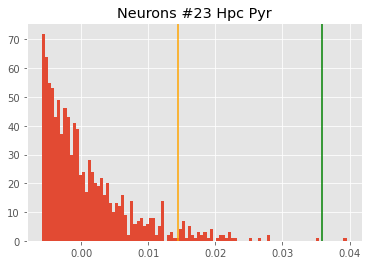

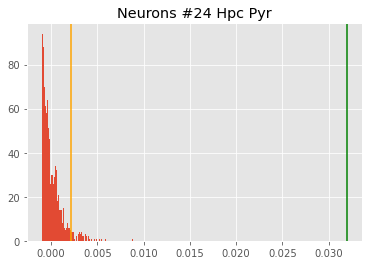

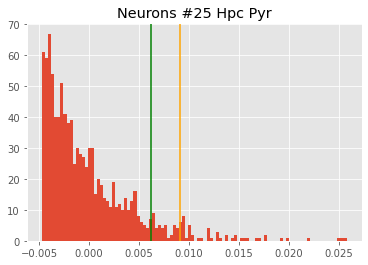

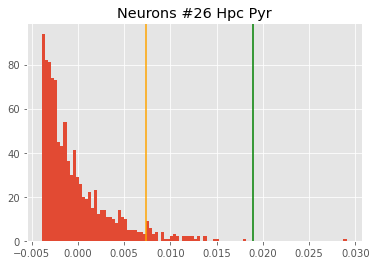

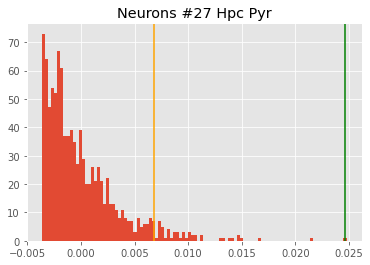

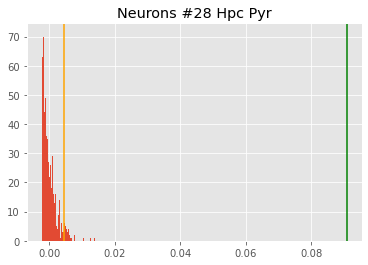

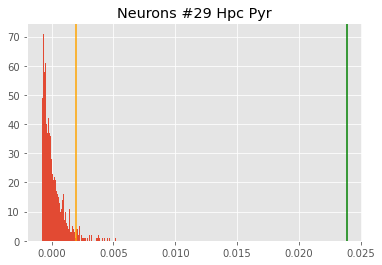

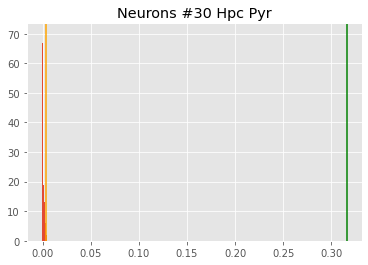

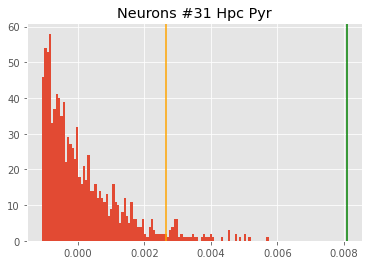

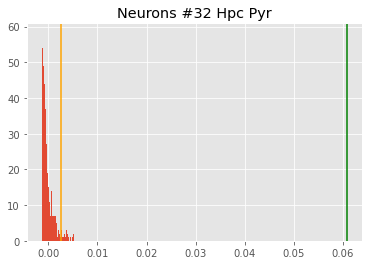

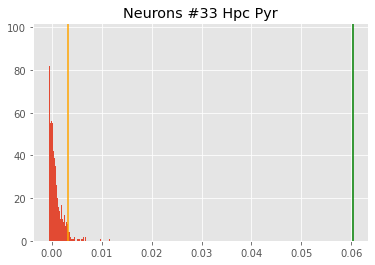

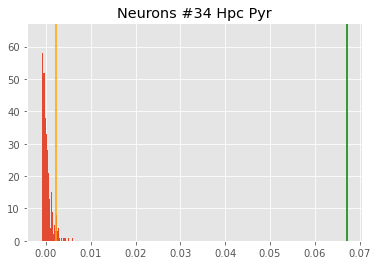

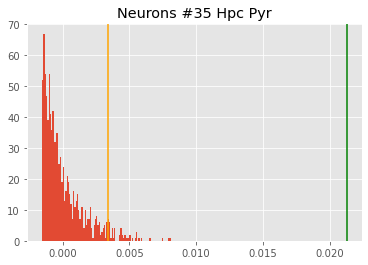

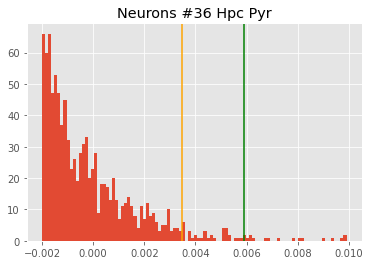

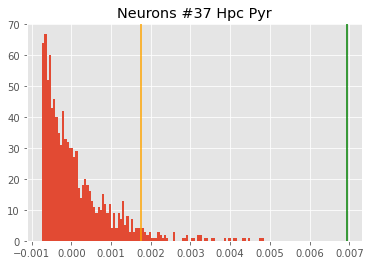

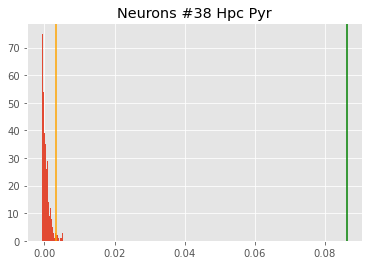

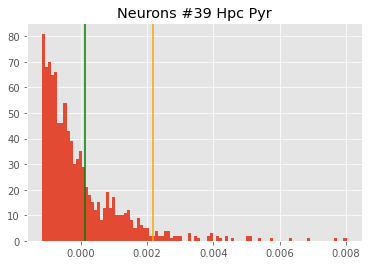

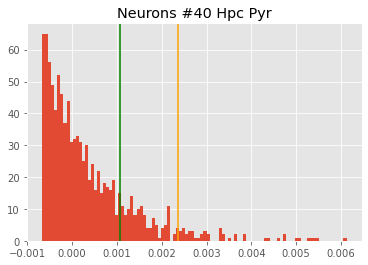

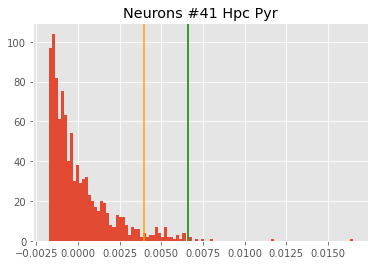

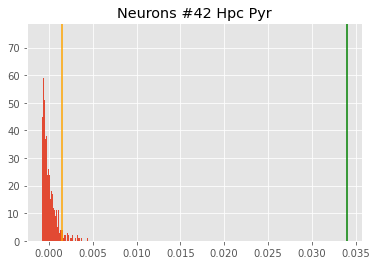

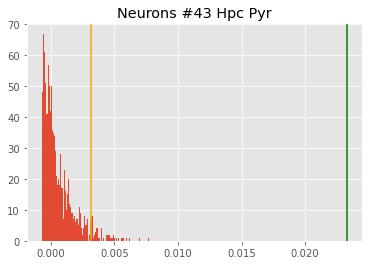

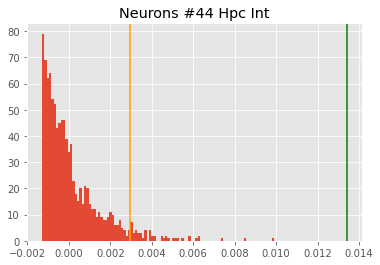

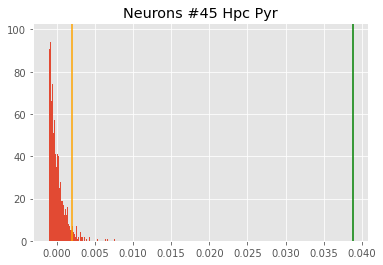

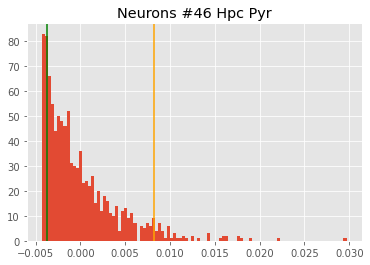

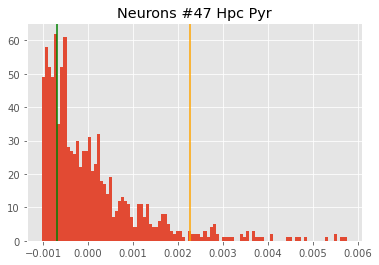

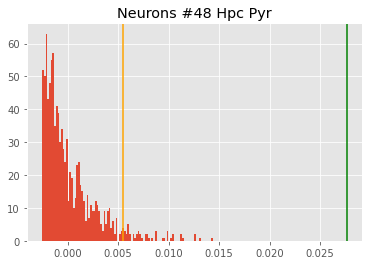

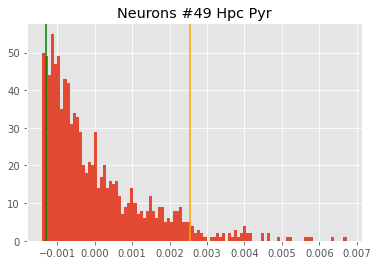

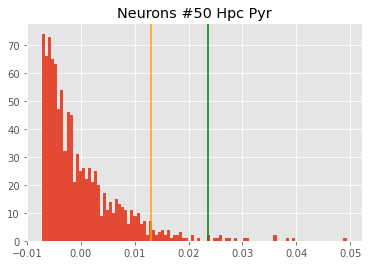

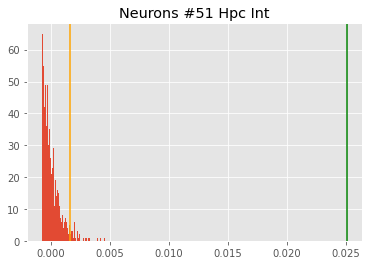

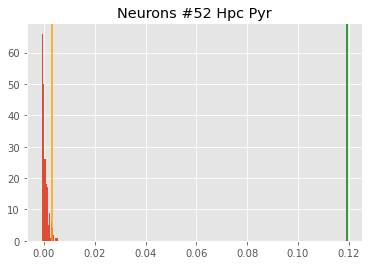

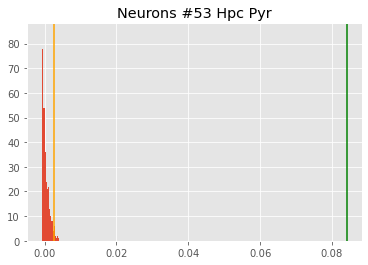

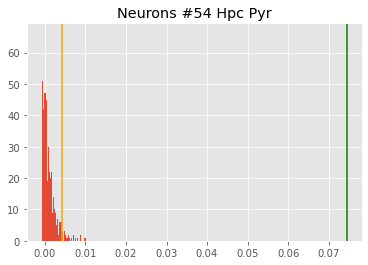

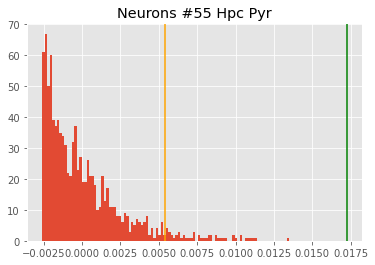

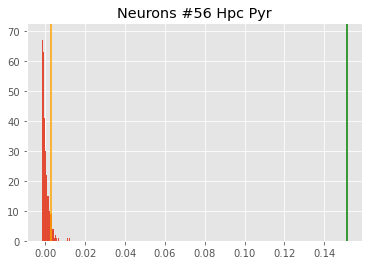

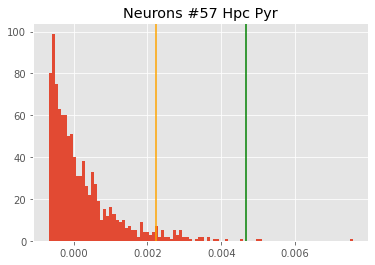

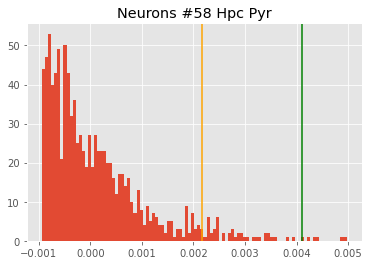

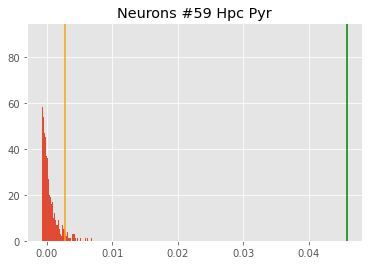

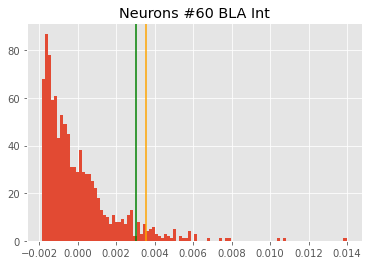

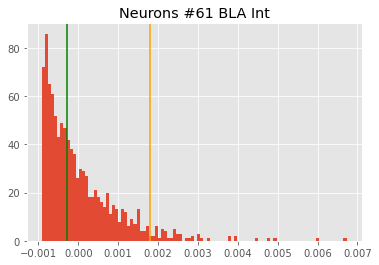

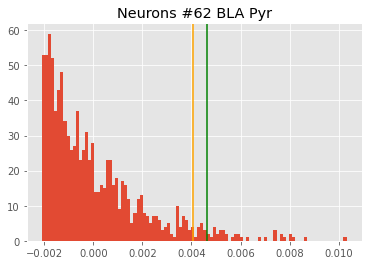

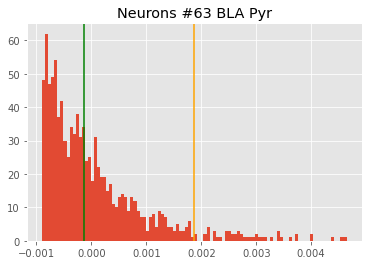

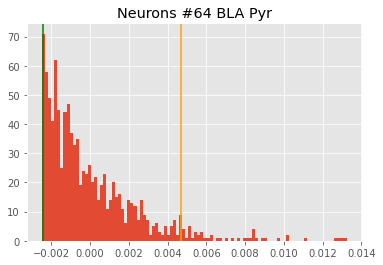

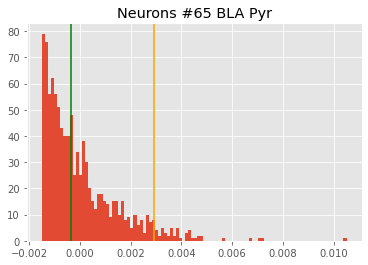

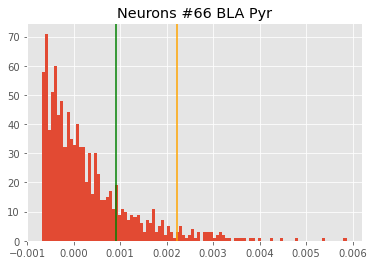

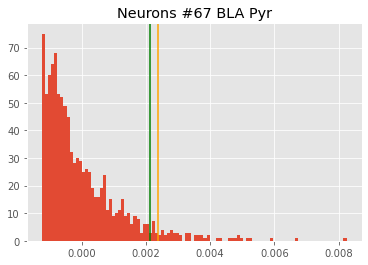

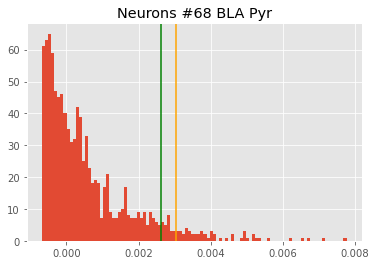

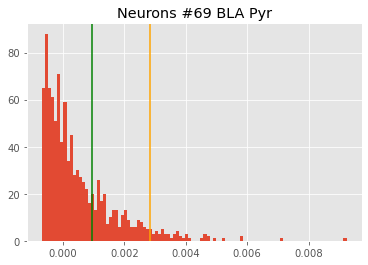

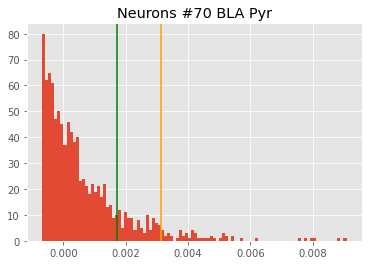

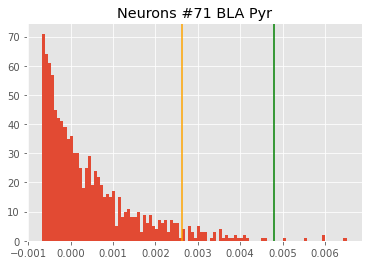

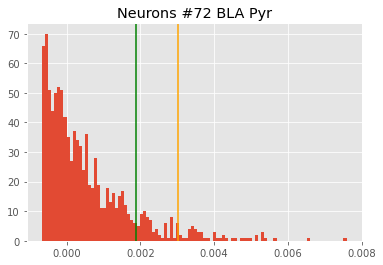

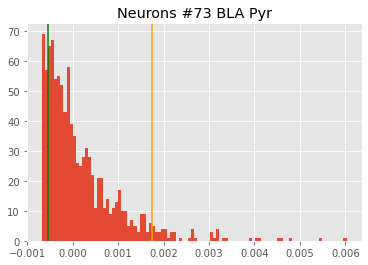

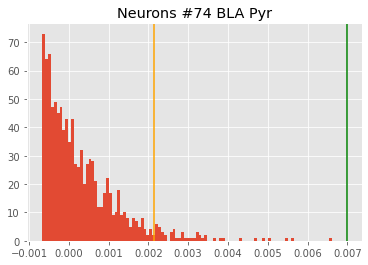

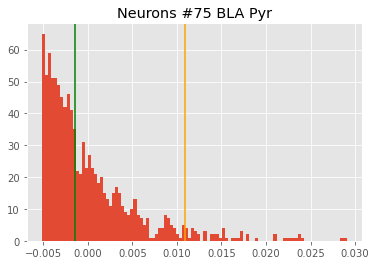

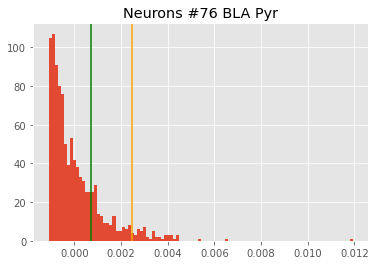

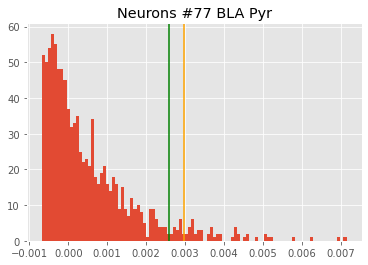

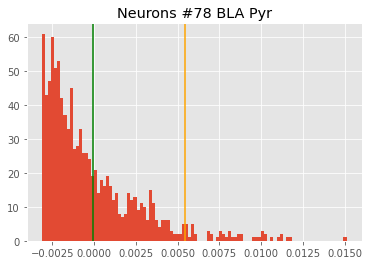

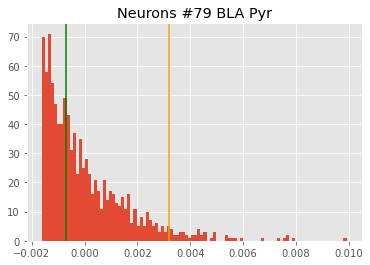

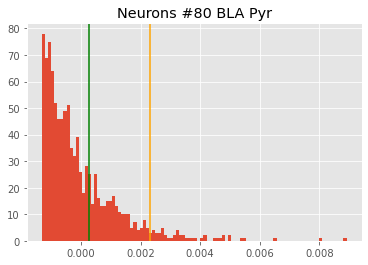

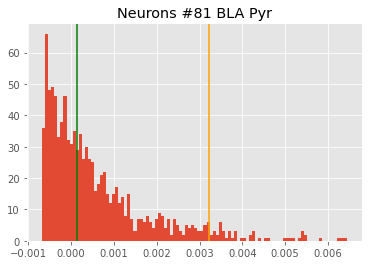

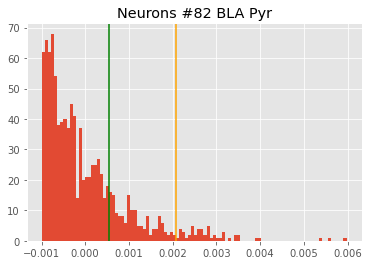

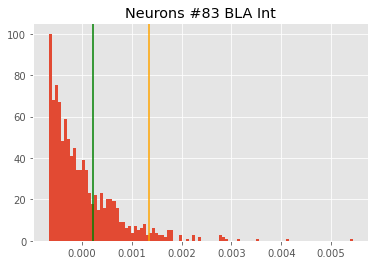

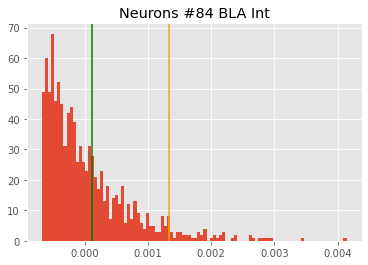

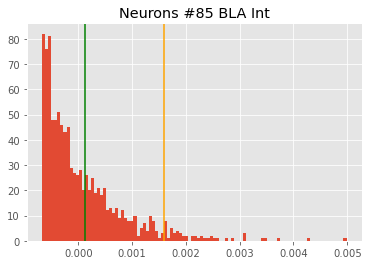

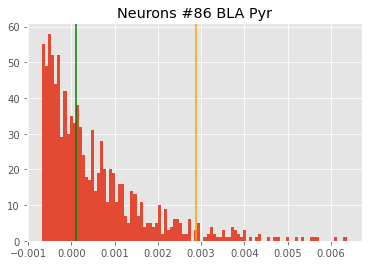

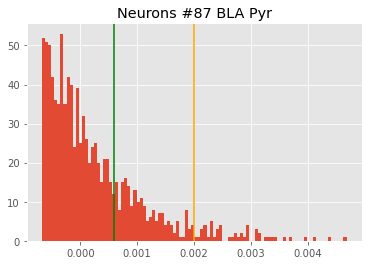

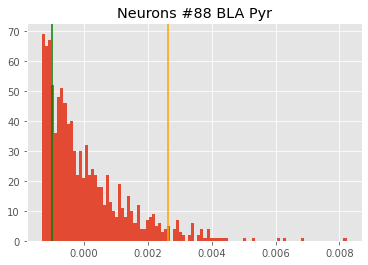

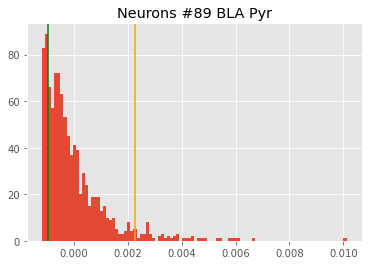

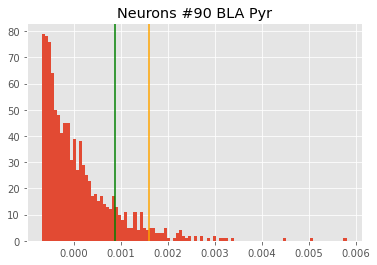

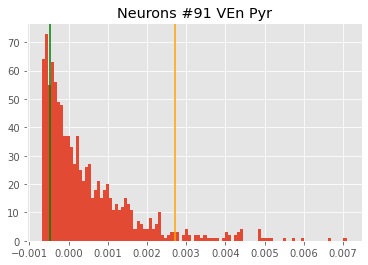

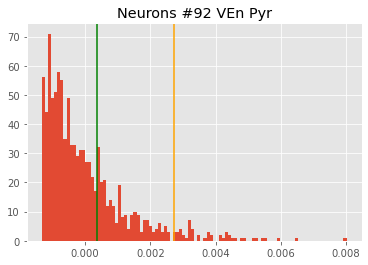

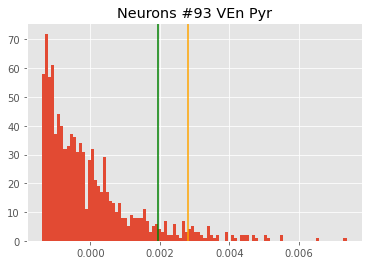

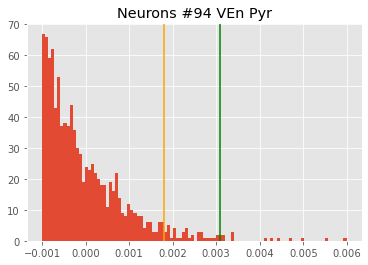

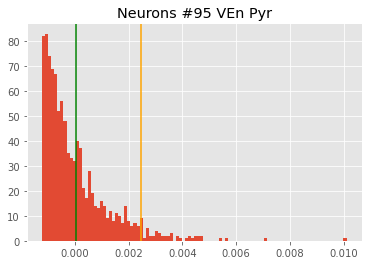

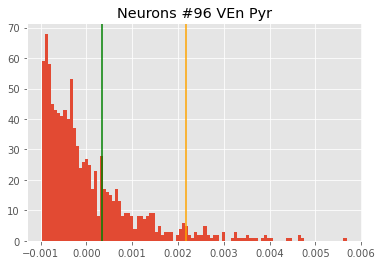

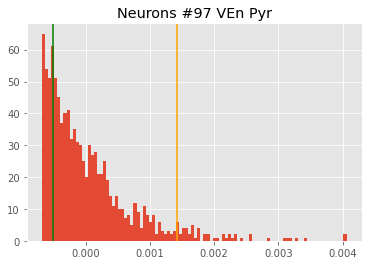

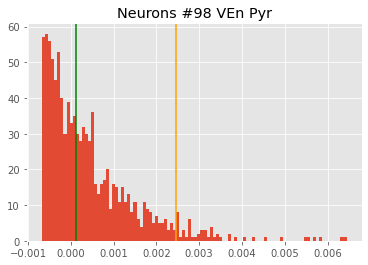

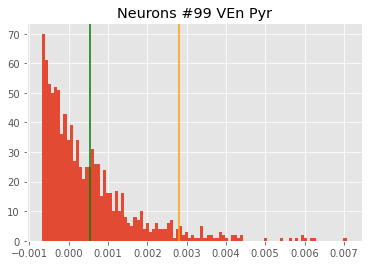

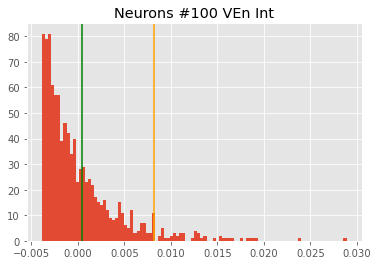

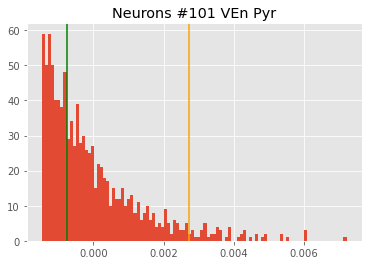

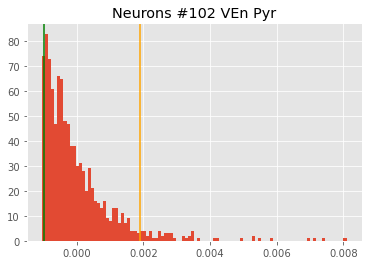

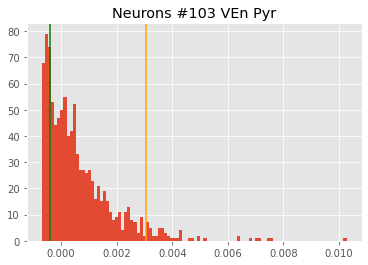

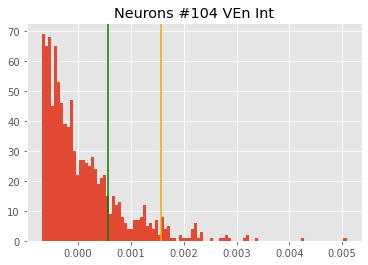

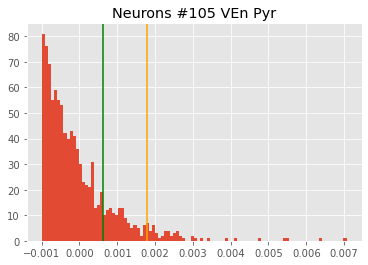

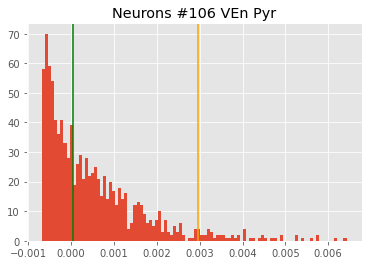

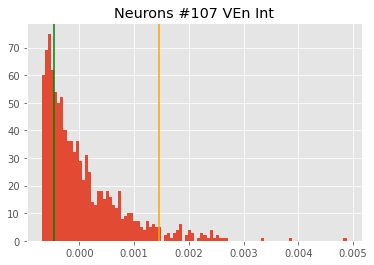

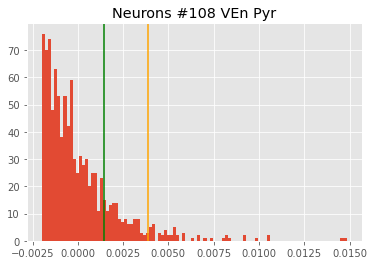

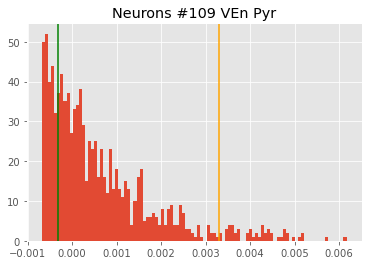

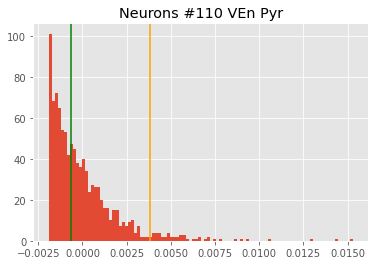

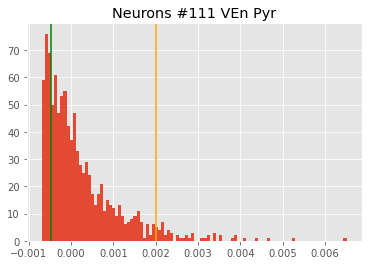

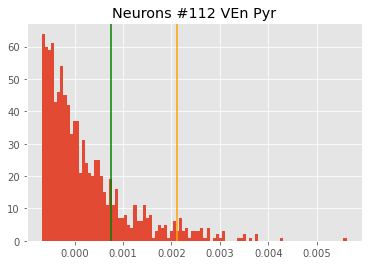

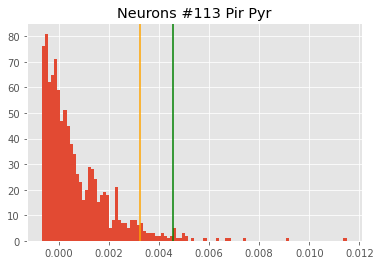

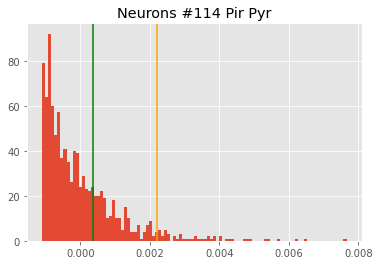

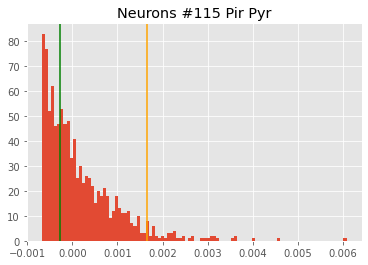

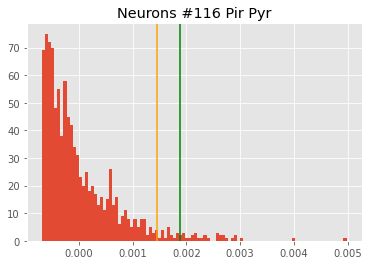

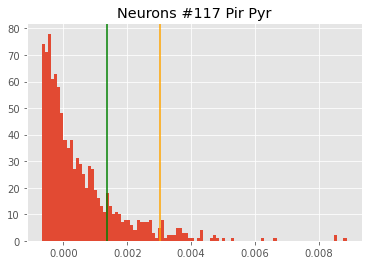

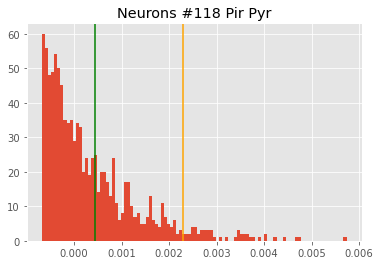

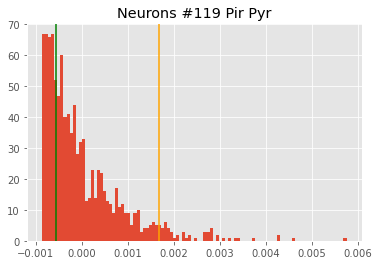

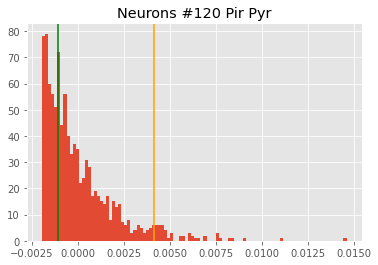

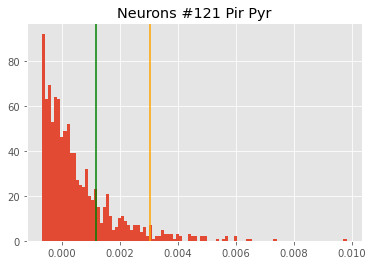

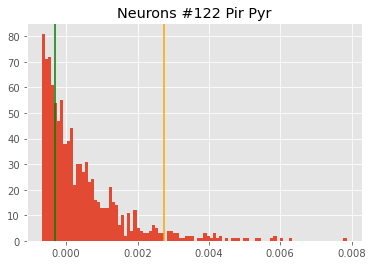

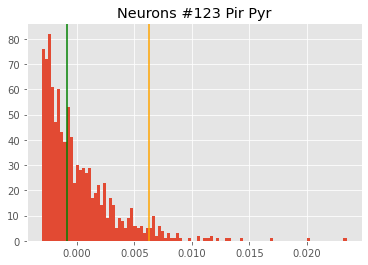

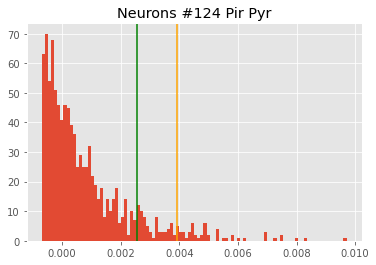

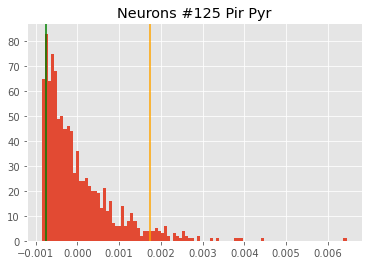

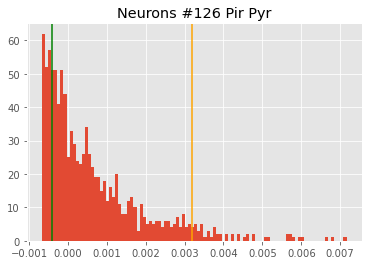

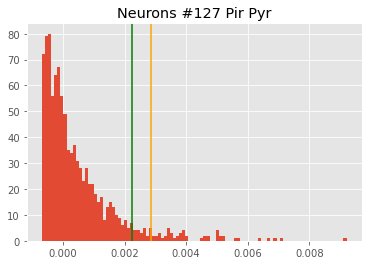

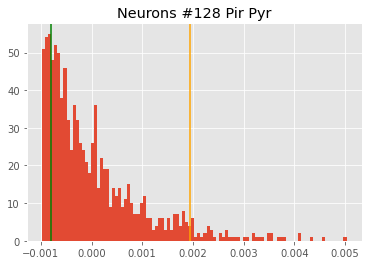

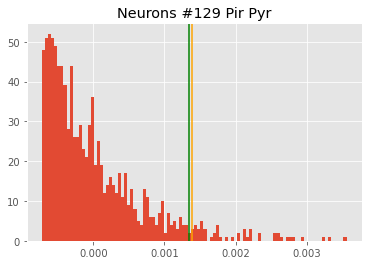

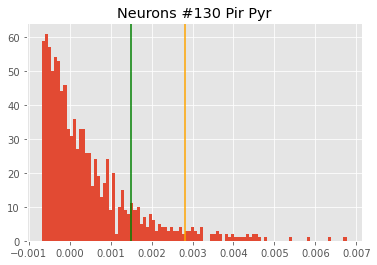

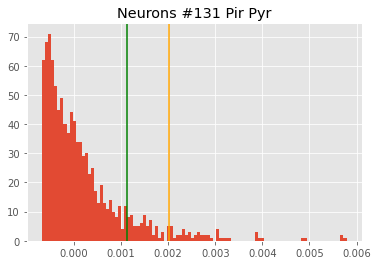

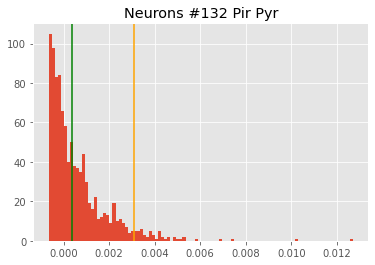

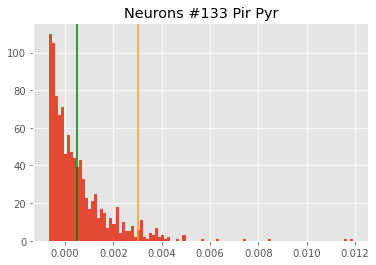

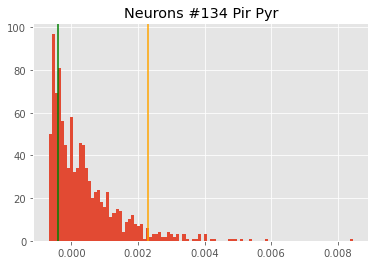

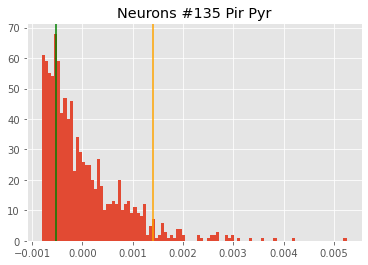

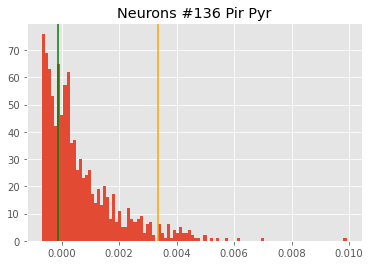

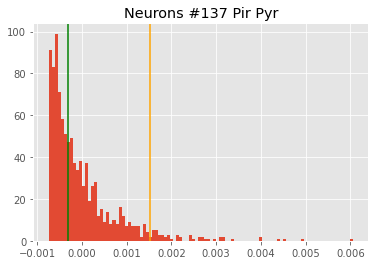

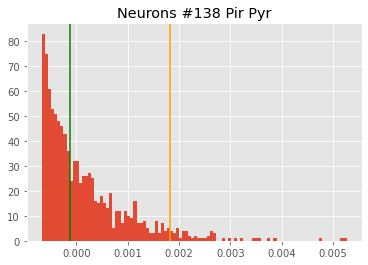

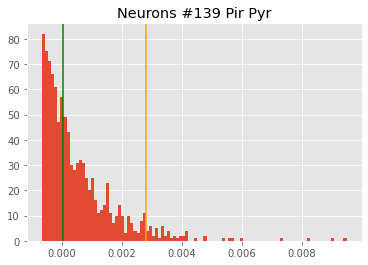

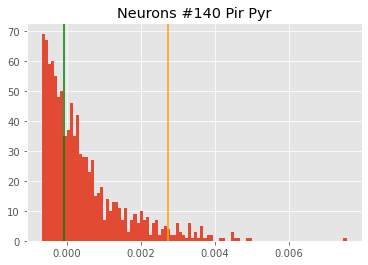

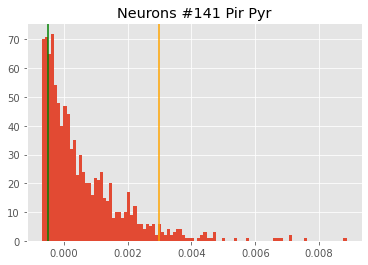

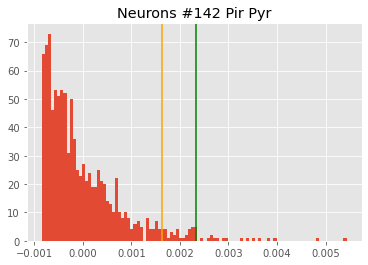

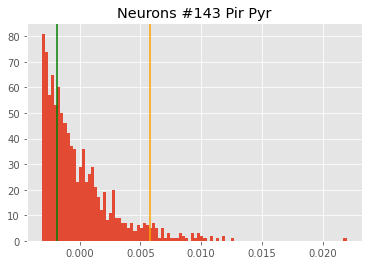

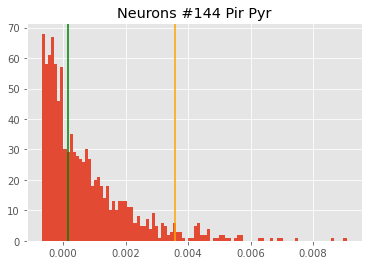

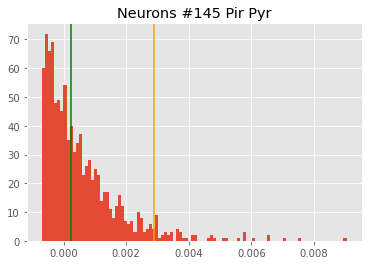

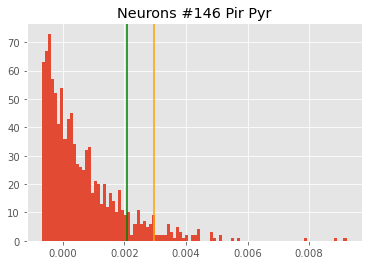

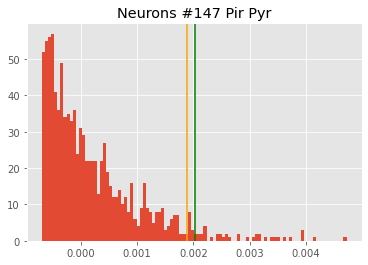

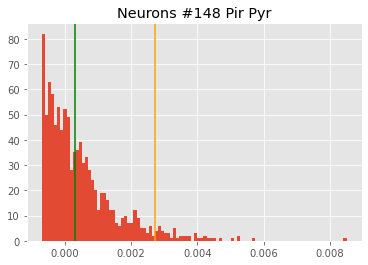

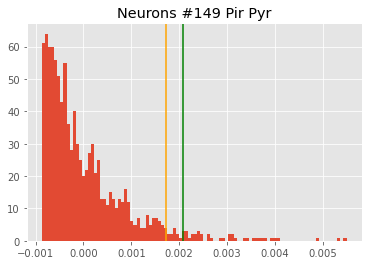

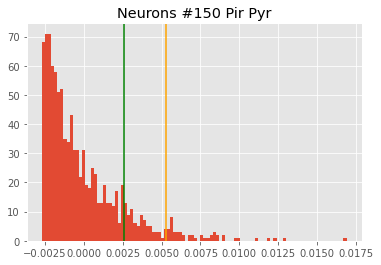

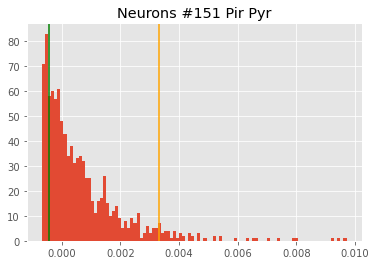

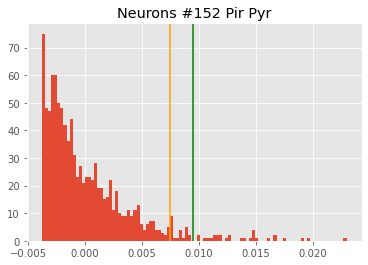

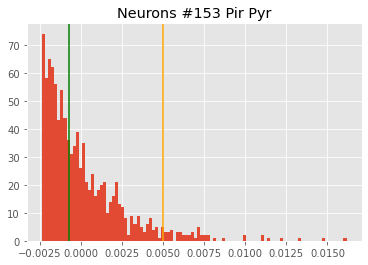

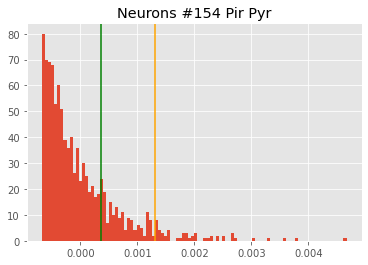

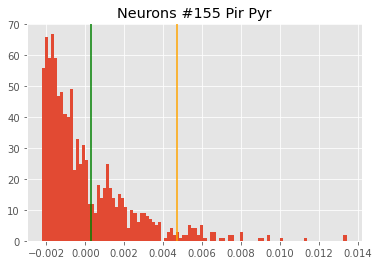

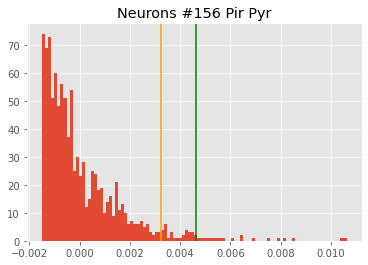

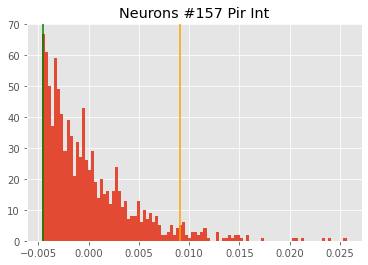

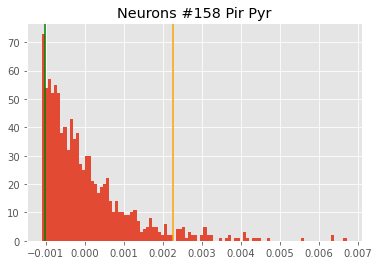

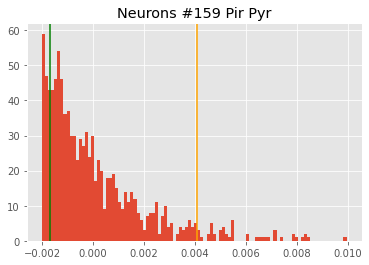

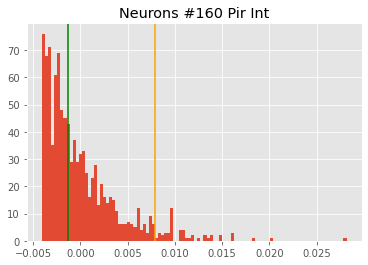

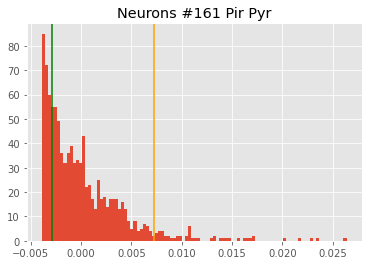

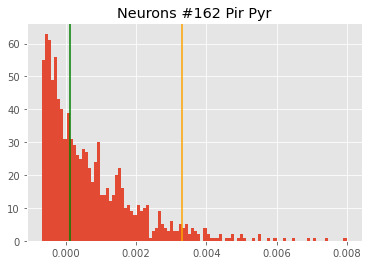

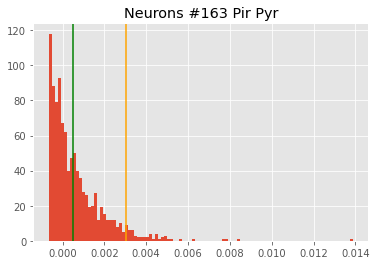

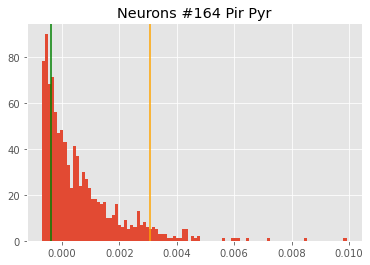

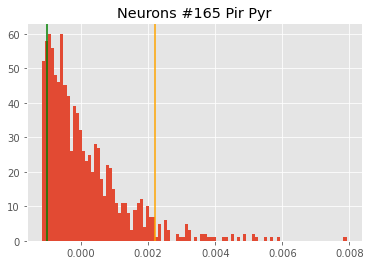

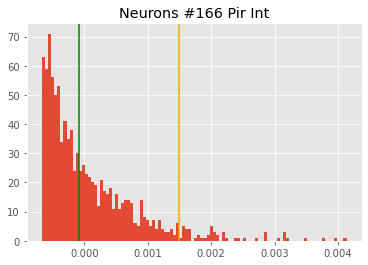

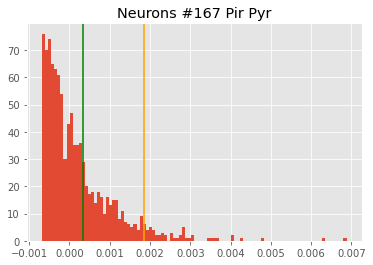

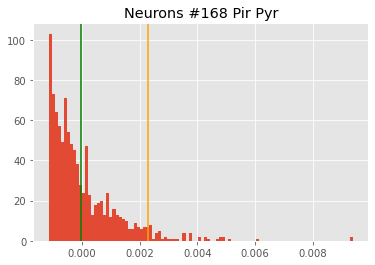

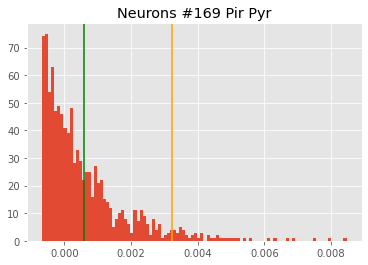

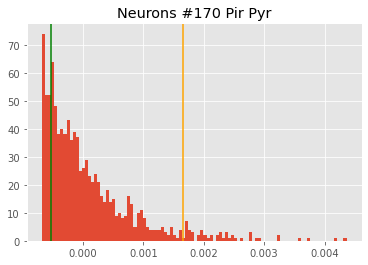

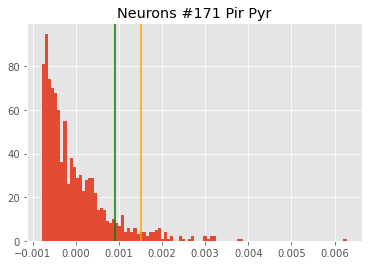

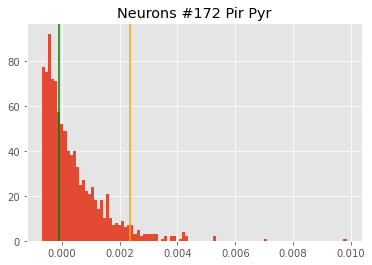

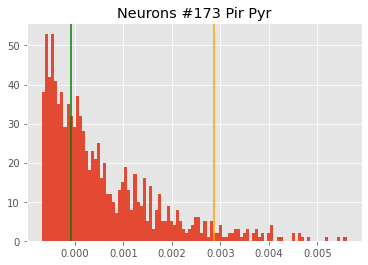

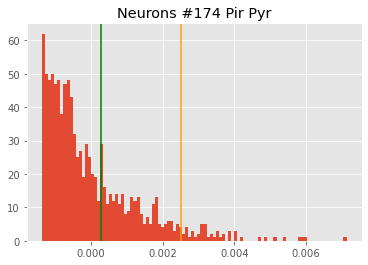

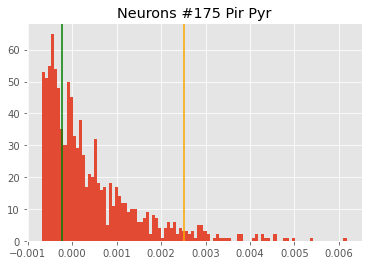

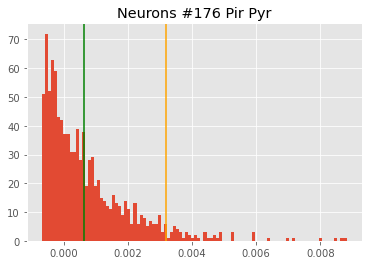

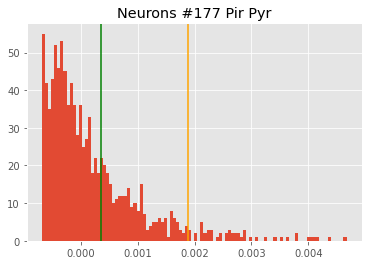

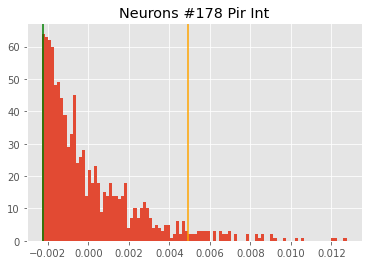

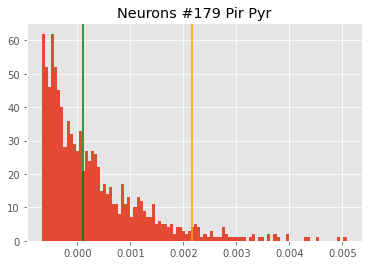

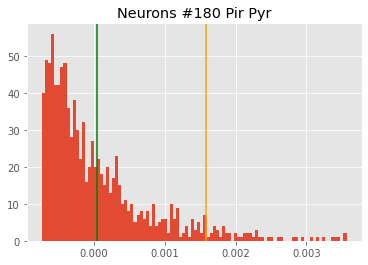

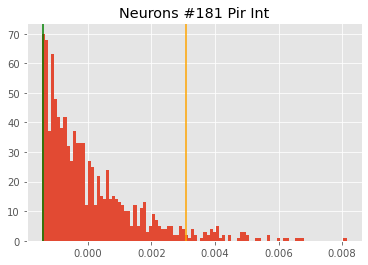

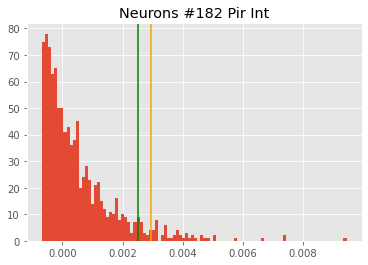

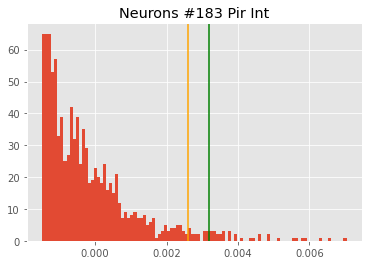

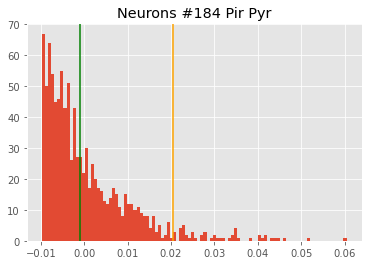

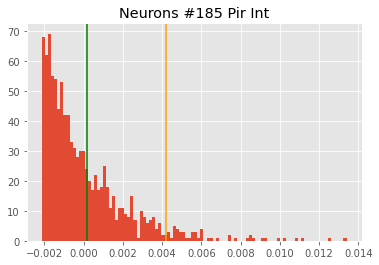

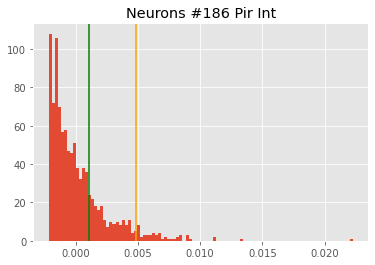

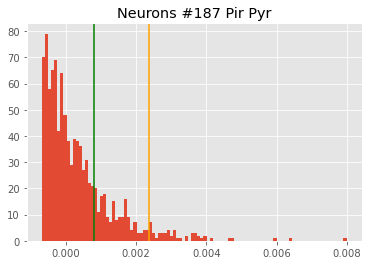

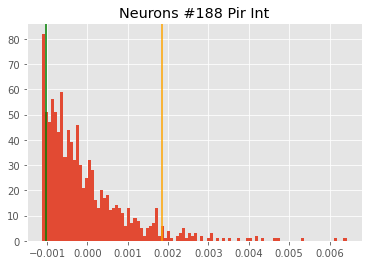

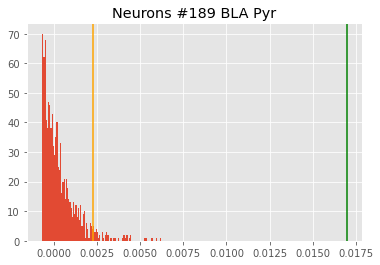

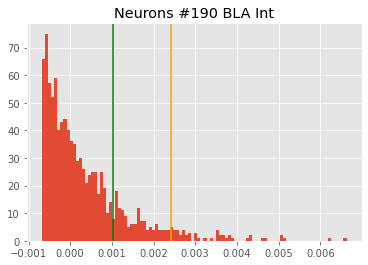

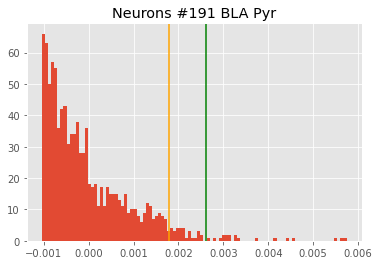

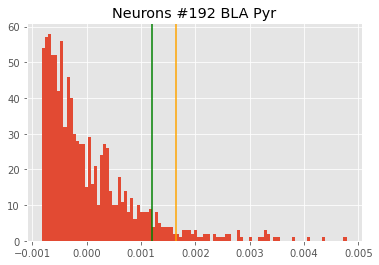

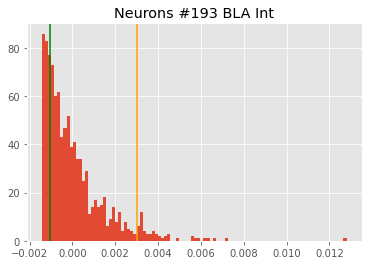

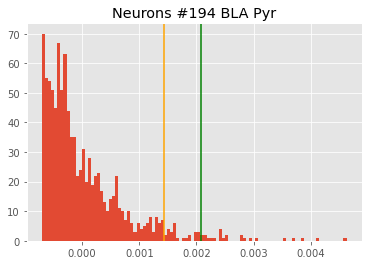

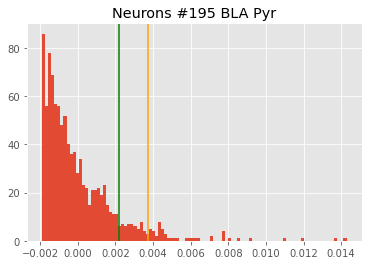

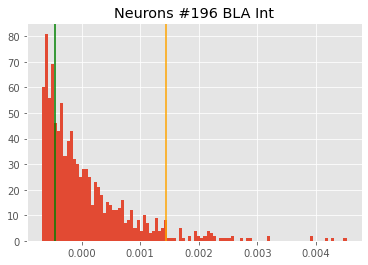

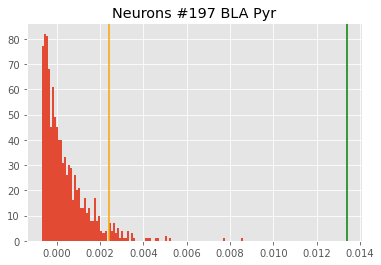

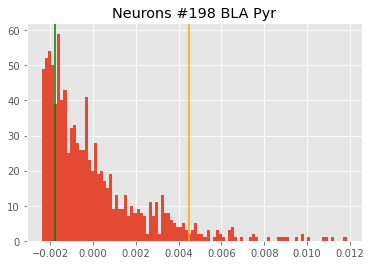

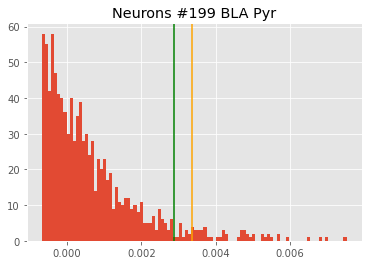

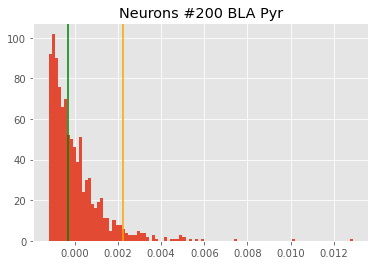

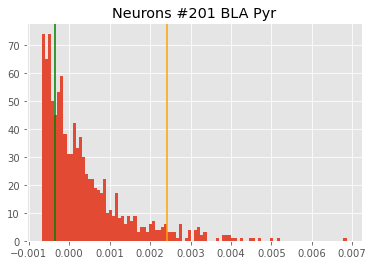

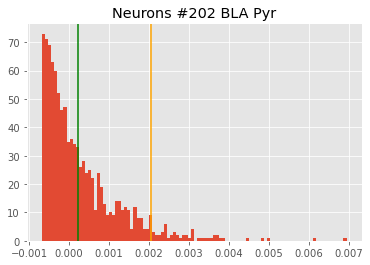

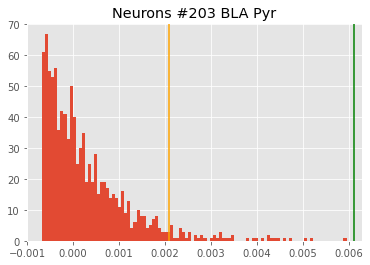

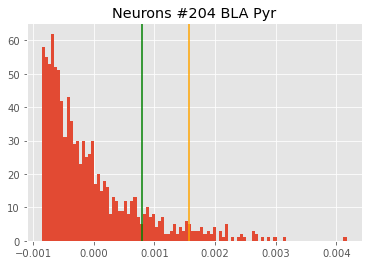

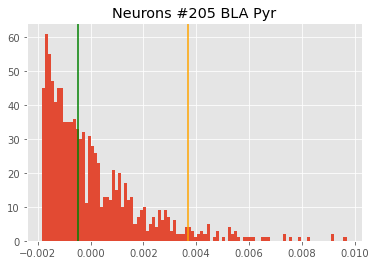

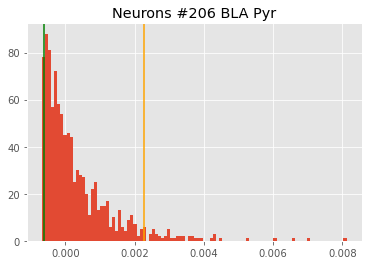

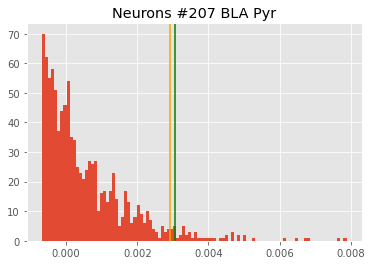

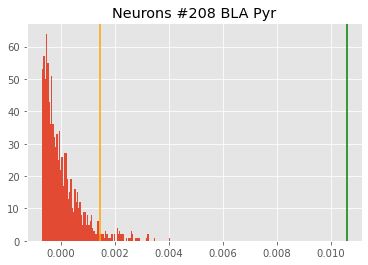

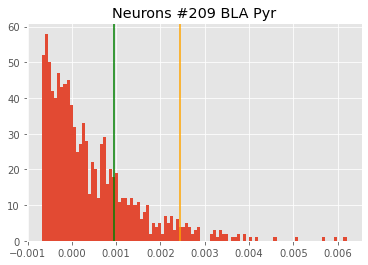

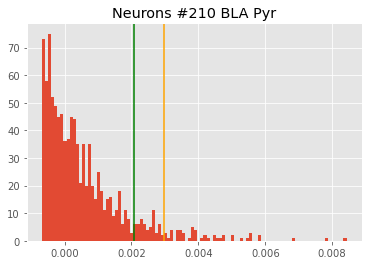

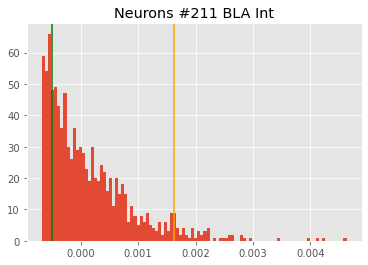

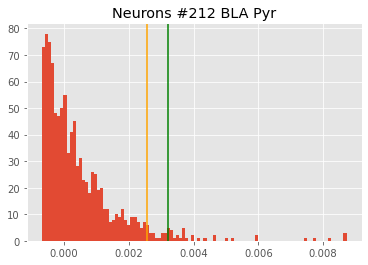

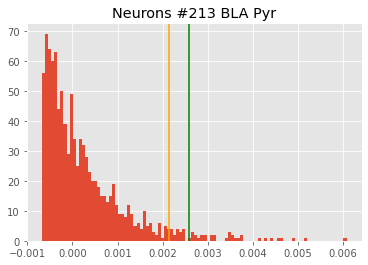

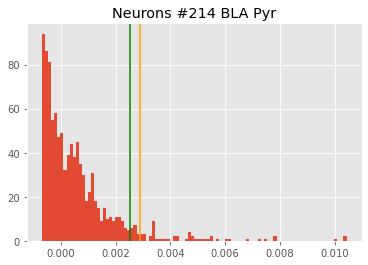

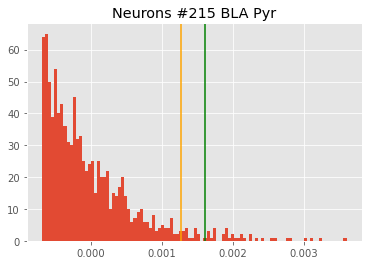

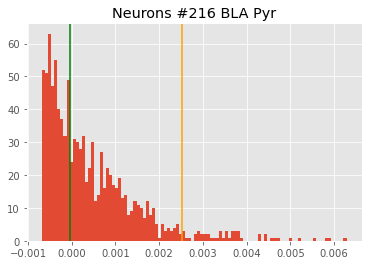

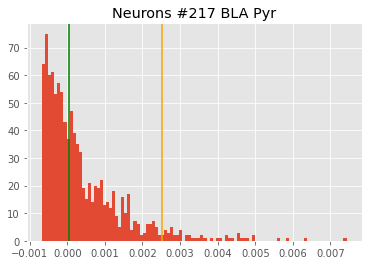

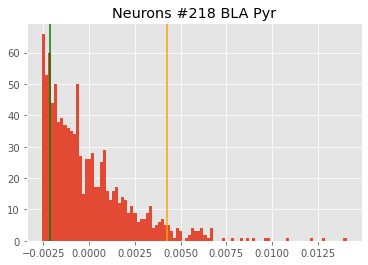

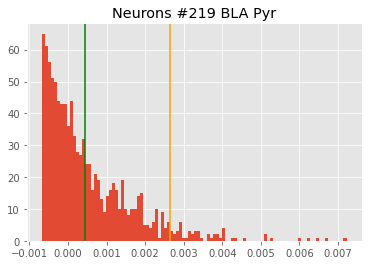

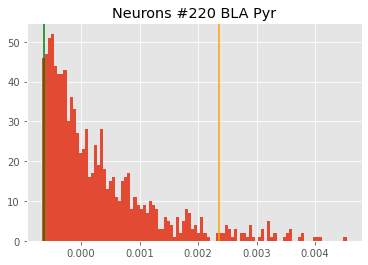

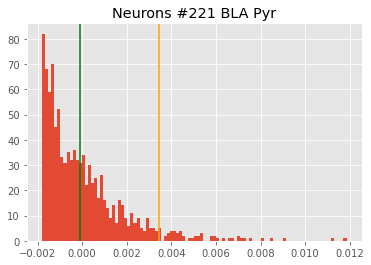

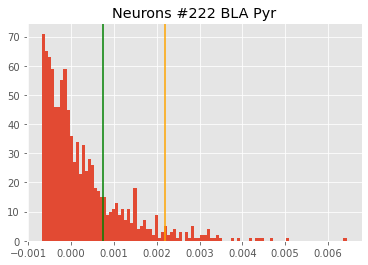

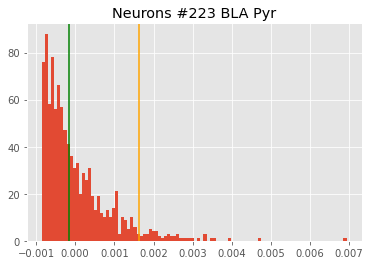

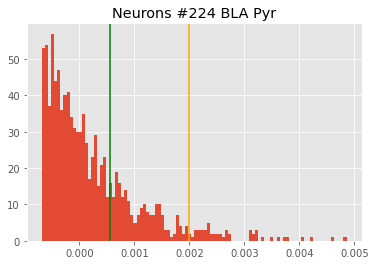

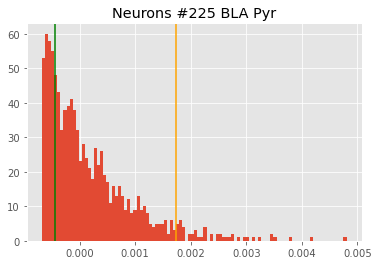

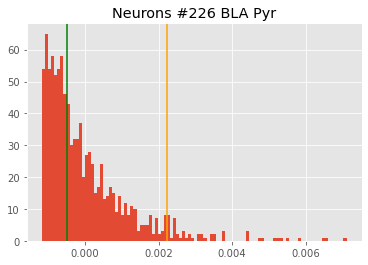

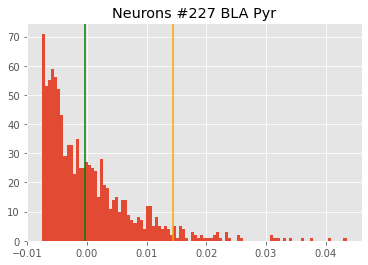

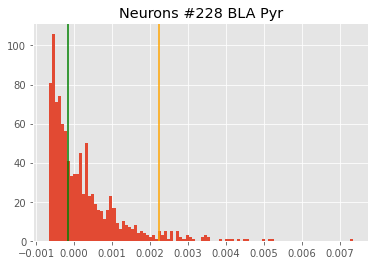

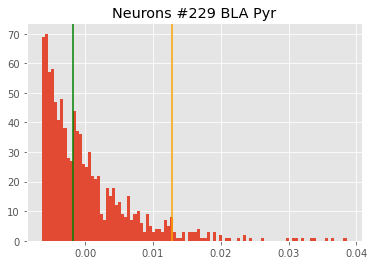

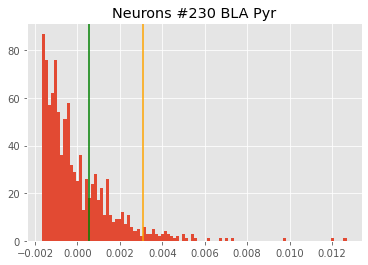

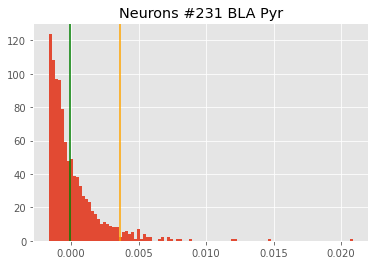

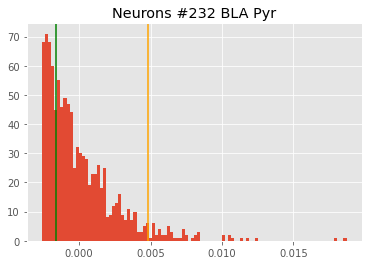

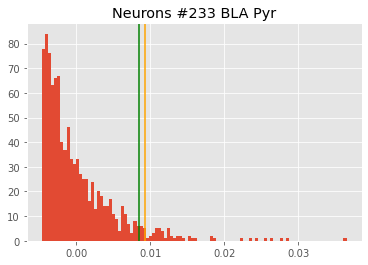

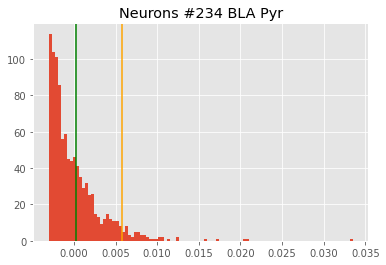

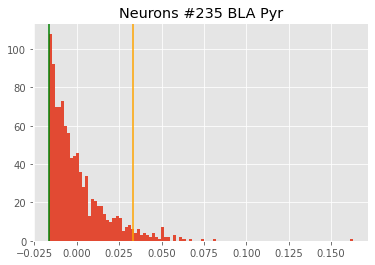

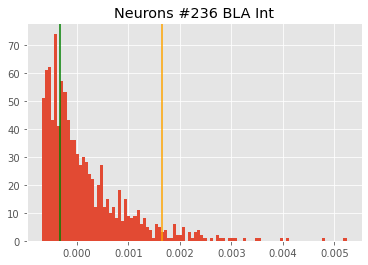

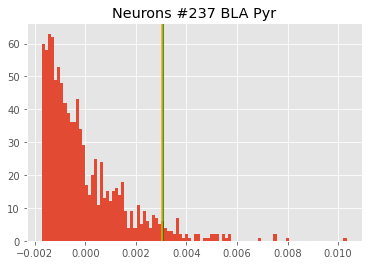

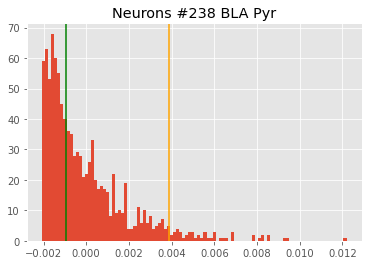

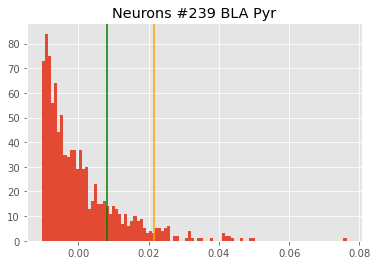

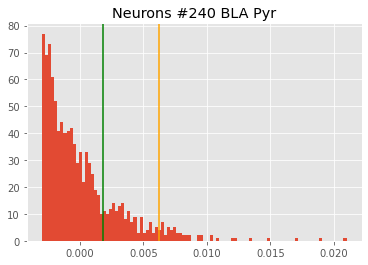

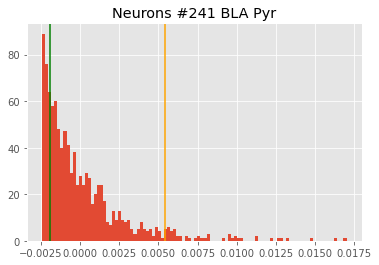

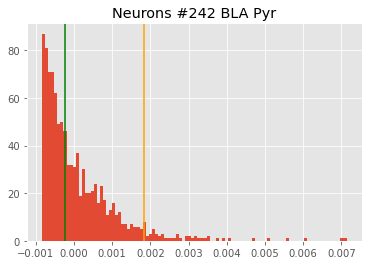

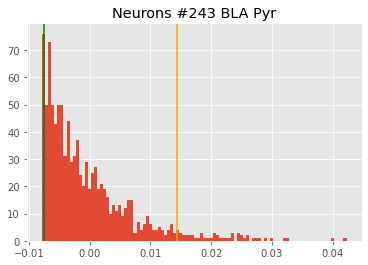

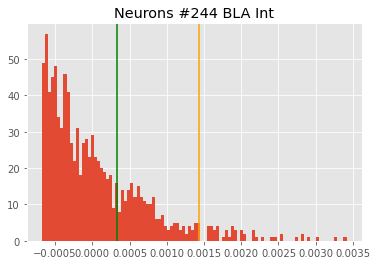

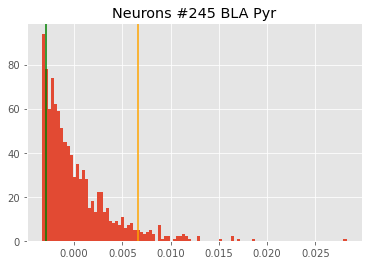

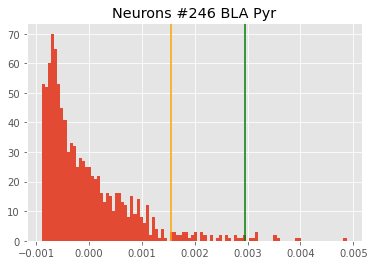

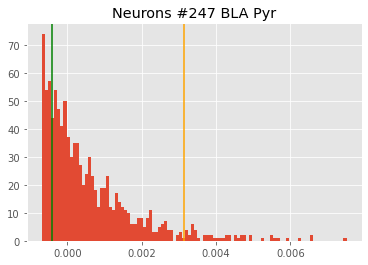

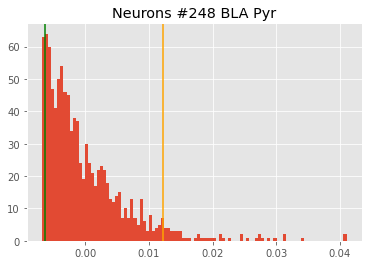

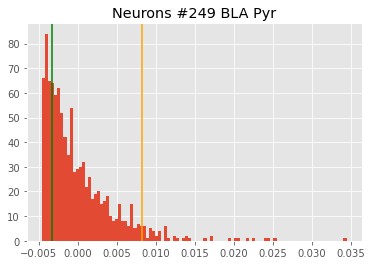

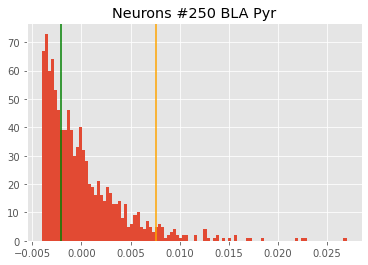

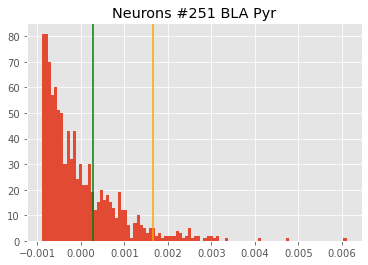

In [71]:
for i in range(len(neurons)):
    neuron = neurons[i].restrict(states['REM'])
    phase = phase
    jitter_max = 140
    n_spikes = 1500
    n_shuffles = 1000

    shuffles = multiprocessing(ppc_jitter, zip(it.repeat(neuron), 
                                        it.repeat(phase), 
                                        it.repeat(jitter_max), 
                                        it.repeat(n_spikes), 
                                        range(n_shuffles)), 
                                        12)
    real = ppc(neuron,phase,n_spikes)
    plt.figure()
    plt.hist(np.array(shuffles)[:,0],100)
    plt.axvline(real,color = 'green')
    plt.axvline(np.quantile(np.array(shuffles)[:,0],0.95),color = 'orange')
    plt.title(f'Neurons #{i} {metadata.Region[i]} {metadata.Type[i]}')

In [53]:
real

0.003967

In [52]:
np.median(shuffles)

0.009159088134765625

In [58]:
np.quantile(np.array(shuffles)[:,0],0.95)

0.003118801116943359

In [59]:
real

0.003967

Text(0.5, 1.0, 'Neurons #70')

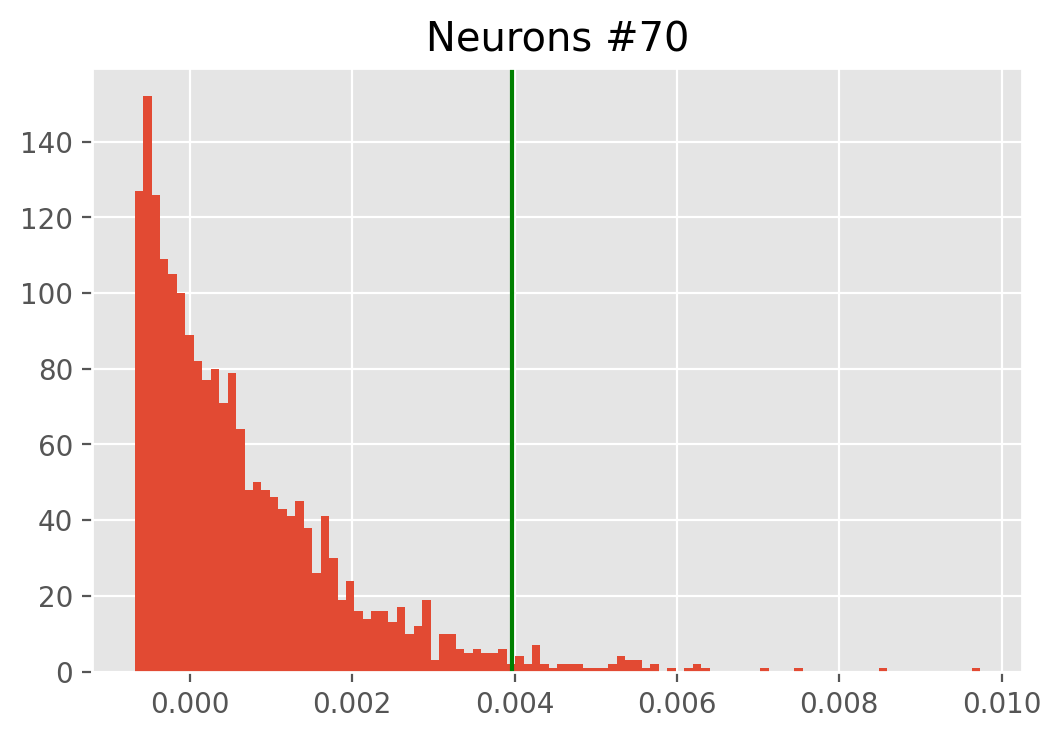

In [44]:
plt.figure(dpi = 200)
plt.hist(np.array(shuffles)[:,0],100)
plt.axvline(real,color = 'green')
plt.title(f'Neurons #{i}')

100%|██████████| 4/4 [01:05<00:00, 16.26s/it]


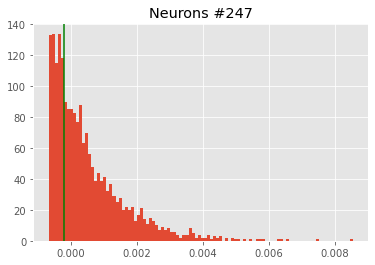

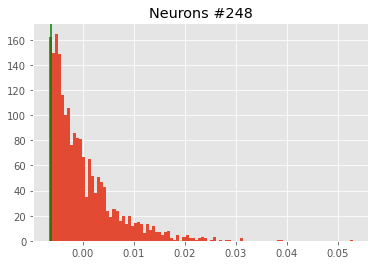

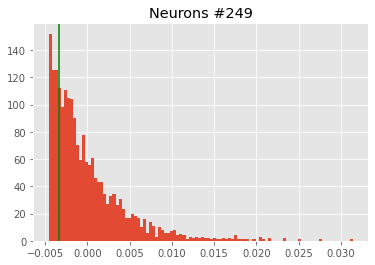

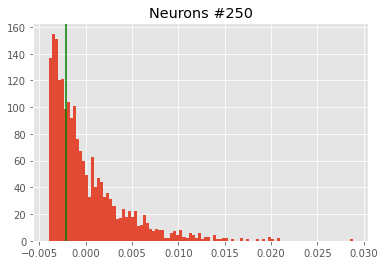

In [40]:
for i in tqdm(range(247,251)):

